In [ ]:
!pip install fasteda
!pip install datacleaner
!pip install imblearn
!pip install pingouin
!pip install datasist
!pip install category_encoders

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import spearmanr
from mlxtend.plotting import heatmap
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
from scipy import stats
pd.set_option('display.max_columns',None)
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
sns.set_palette('rocket')
from time import time
import pingouin
from scipy.stats import ttest_ind
from datasist.structdata import detect_outliers
from geopy.distance import great_circle
from category_encoders import WOEEncoder
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'pingouin'

# Without PCA

# Reading the CSV File and loading the data

In [3]:
data = pd.read_csv("/kaggle/input/fraudtrain/fraudTrain.csv")
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
print("Train Data Info:")
print(data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  l

In [5]:
data.shape

(1296675, 23)

# Data PreProcessing

In [6]:
#Drop unnecessary columns
#We will drop lcoation of customer as we will get the distance between
#Merchant and customer location later
data.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  dob                    1296675 non-null  object 
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

In [8]:
#Check Nulls
data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Conclusion: The datasource free of null values and

In [9]:
data.duplicated().sum()

0

**We have not found any duplicate transactions in the data. Each record is a unique transaction.**

In [10]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Class Distribution

In [11]:
# Check the class distribution
class_distribution = data['is_fraud'].value_counts()
print(class_distribution)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [12]:
print('No Frauds', round(data['is_fraud'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['is_fraud'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.42 % of the dataset
Frauds 0.58 % of the dataset


**The classes are heavily skewed we need to solve this issue later. There clearly exists a immbalnace in the classes. we can deal with this using Oversampling using SMOTE or undersampling. We will focus on this in the later section.**

# Visualize the Class distribution

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


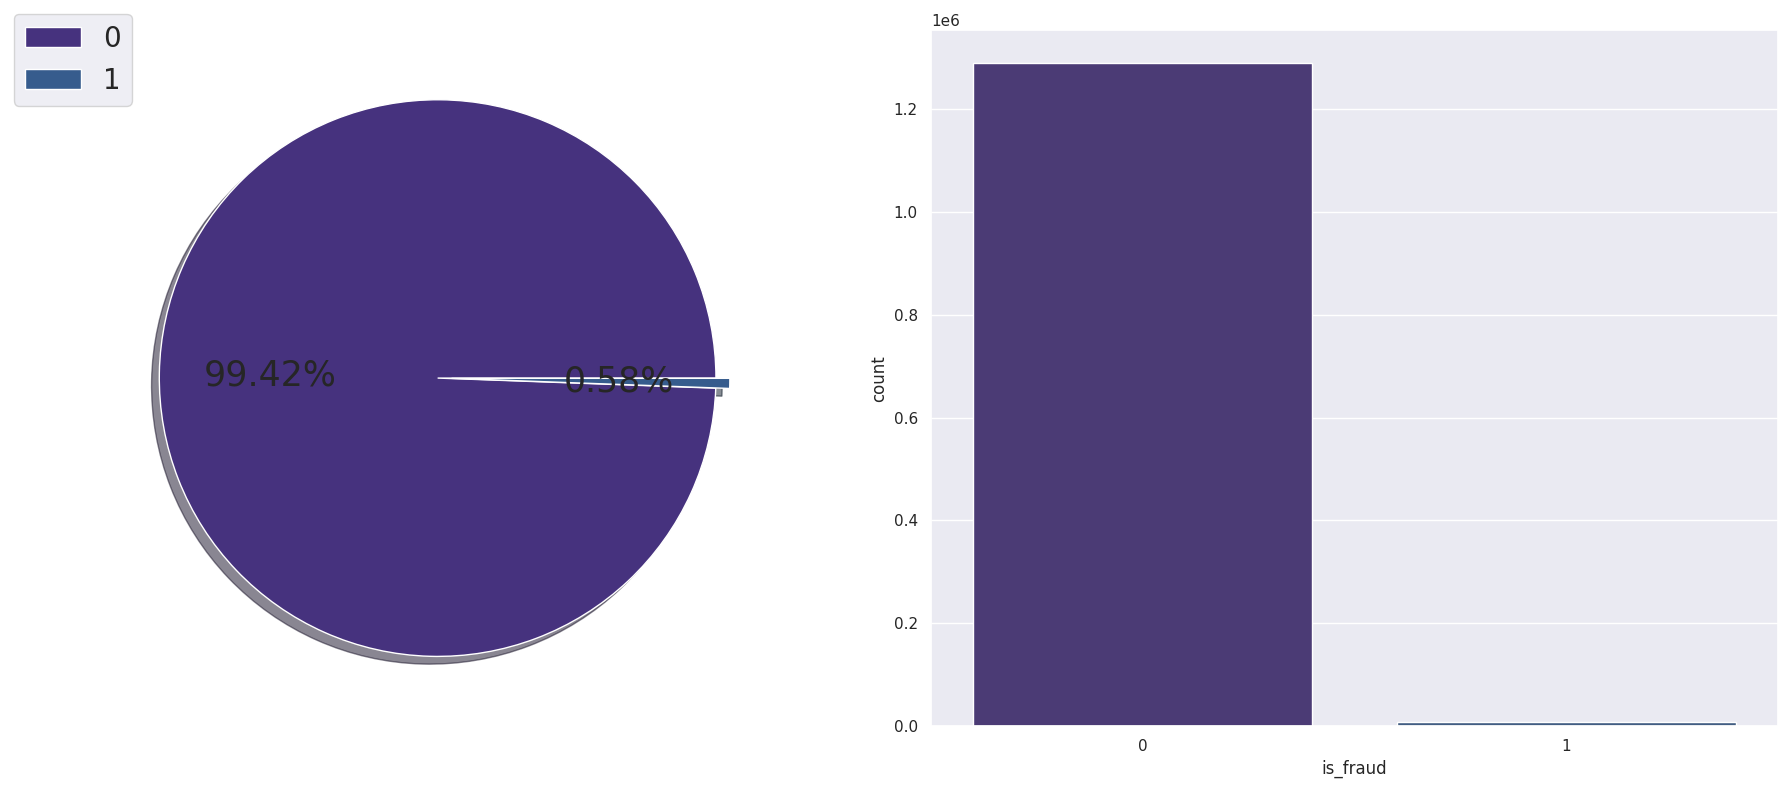

In [13]:
def pie_bar_plot(col):
    print(data[col].value_counts())
    sns.set_palette('viridis')
    fig,axs=plt.subplots(1,2)
    axs[0].pie(data[col].value_counts().values.tolist(),autopct='%.2f%%',textprops={'fontsize':25},explode=[0,0.05],shadow=True)
    sns.countplot(data=data,x=col,ax=axs[1])
    fig.legend(labels=data[col].value_counts().index.tolist(),loc='upper left',fontsize=20)
    fig.tight_layout()
    fig.show()
pie_bar_plot('is_fraud')

**It is clear from the above distribtuion that the data is highly imbalanced**

# Changing the date type and Splititng the 'trans_date_trans_time' column

In [14]:
#Change date type
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],format='mixed')
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day_name()
data['month'] = data['trans_date_trans_time'].dt.month
data['dob']=pd.to_datetime(data['dob'],format='mixed')

# Cleaning the Merchant Column.

In [15]:
#clean merchant column
data['merchant'] = data['merchant'].apply(lambda x : x.replace('fraud_',''))

In [16]:
data[['merchant']].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


# Findind distance in miles

In [17]:
#Location between customer home and merchant
data['distance'] = data.apply(lambda col : round(great_circle((col['lat'],col['long']),
                                         (col['merch_lat'],col['merch_long'])).miles,2),axis=1)

In [18]:
data.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)

In [19]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,hour,day,month,distance
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0,0,Tuesday,1,48.84
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0,0,Tuesday,1,18.77
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,1962-01-19,0,0,Tuesday,1,67.24
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,1967-01-12,0,0,Tuesday,1,59.45
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,1986-03-28,0,0,Tuesday,1,48.19


# Exploratory Data Analysis

In [20]:
data.describe()

,trans_date_trans_time,cc_num,amt,zip,city_pop,dob,is_fraud,hour,month,distance
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,8.882444e+04,1973-10-03 19:02:55.017178512,5.788652e-03,1.280486e+01,6.142150e+00,4.729552e+01
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.300000e+01,1924-10-30 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-02
25%,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,7.430000e+02,1962-08-13 00:00:00,0.000000e+00,7.000000e+00,3.000000e+00,3.438000e+01
50%,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,2.456000e+03,1975-11-30 00:00:00,0.000000e+00,1.400000e+01,6.000000e+00,4.861000e+01
75%,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,2.032800e+04,1987-02-22 00:00:00,0.000000e+00,1.900000e+01,9.000000e+00,6.121000e+01
max,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,2.906700e+06,2005-01-29 00:00:00,1.000000e+00,2.300000e+01,1.200000e+01,9.452000e+01
std,NaN,1.308806e+18,1.603160e+02,2.689322e+04,3.019564e+05,NaN,7.586269e-02,6.817824e+00,3.417703e+00,1.809245e+01


In [21]:
data.describe(include='object')

,merchant,category,gender,city,job,day
count,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,894,494,7
top,Kilback LLC,gas_transport,F,Birmingham,Film/video editor,Monday
freq,4403,131659,709863,5617,9779,254282


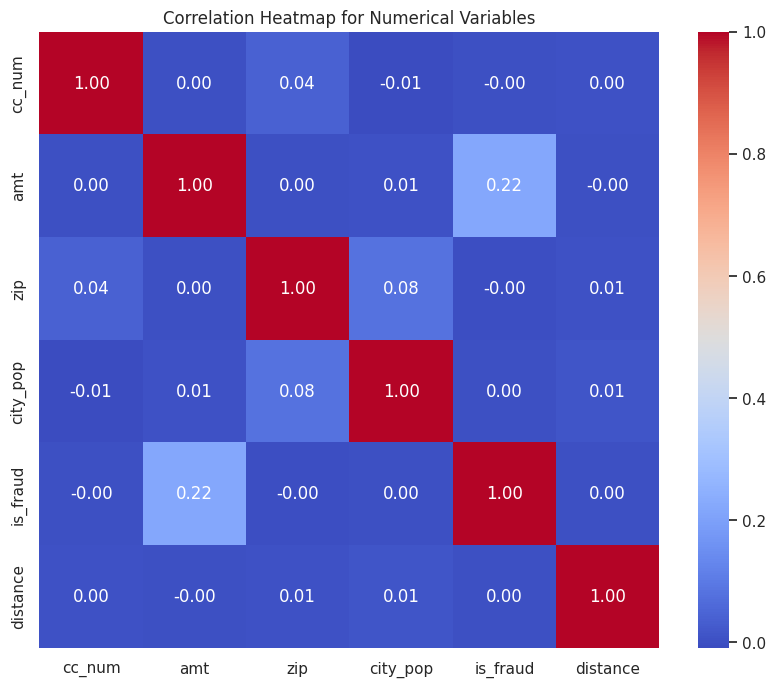

In [22]:
# Step 5: Create a correlation matrix for numerical variables
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Step 6: Create a heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

In [23]:
cols = data.columns
cols

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'zip', 'city_pop', 'job', 'dob', 'is_fraud', 'hour',
       'day', 'month', 'distance'],
      dtype='object')

In [24]:
# Calculate Spearman correlation coefficient between 'Class' and each feature

for col in cols[1:-6]:
    rho, p = spearmanr(data[col].values, data['is_fraud'].values)
    print('Spearman correlation between is_fraud and %s is %s' %(col, round(rho, 4)))

Spearman correlation between is_fraud and cc_num is 0.0004
Spearman correlation between is_fraud and merchant is -0.0006
Spearman correlation between is_fraud and category is 0.0197
Spearman correlation between is_fraud and amt is 0.0879
Spearman correlation between is_fraud and gender is 0.0076
Spearman correlation between is_fraud and city is -0.0021
Spearman correlation between is_fraud and zip is -0.0023
Spearman correlation between is_fraud and city_pop is 0.0013
Spearman correlation between is_fraud and job is -0.0001


In [25]:
#We can't detect a clear corr between features
data.select_dtypes(include='number').corr()

,cc_num,amt,zip,city_pop,is_fraud,hour,month,distance
cc_num,1.000000,0.001769,0.041459,-0.008991,-0.000981,-0.000801,-0.000281,0.003730
amt,0.001769,1.000000,0.001843,0.005818,0.219404,-0.022811,-0.001748,-0.001085
zip,0.041459,0.001843,1.000000,0.078467,-0.002162,0.005938,0.000852,0.006183
city_pop,-0.008991,0.005818,0.078467,1.000000,0.002136,0.020381,0.000137,0.010902
is_fraud,-0.000981,0.219404,-0.002162,0.002136,1.000000,0.013799,-0.012409,0.000403
hour,-0.000801,-0.022811,0.005938,0.020381,0.013799,1.000000,-0.000356,0.000333
month,-0.000281,-0.001748,0.000852,0.000137,-0.012409,-0.000356,1.000000,0.000098
distance,0.003730,-0.001085,0.006183,0.010902,0.000403,0.000333,0.000098,1.000000


In [26]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,hour,day,month,distance
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0,0,Tuesday,1,48.84
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0,0,Tuesday,1,18.77
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,1962-01-19,0,0,Tuesday,1,67.24
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,1967-01-12,0,0,Tuesday,1,59.45
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,1986-03-28,0,0,Tuesday,1,48.19


In [27]:
cat_counts = data.groupby(['category','is_fraud'])['is_fraud'].count().unstack()
cat_counts

is_fraud,0,1
category,,
entertainment,93781,233
food_dining,91310,151
gas_transport,131041,618
grocery_net,45318,134
grocery_pos,121895,1743
health_fitness,85746,133
home,122917,198
kids_pets,112796,239
misc_net,62372,915


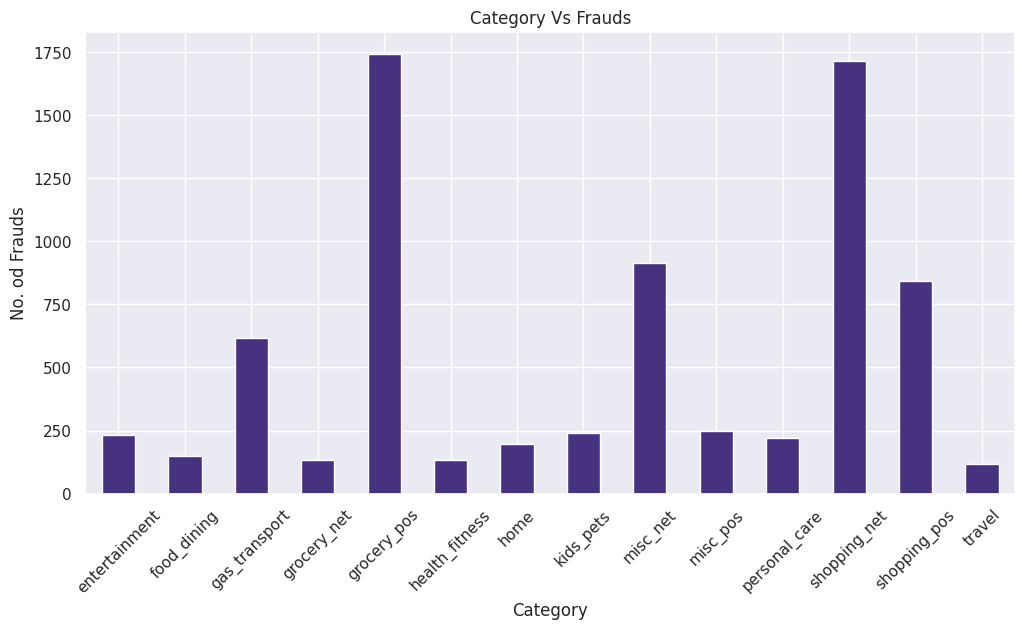

In [28]:
cat_counts_fraud = cat_counts[1]
ccc = cat_counts_fraud.plot(kind='bar', figsize=(12, 6))
ccc.set_ylabel('No. od Frauds')
ccc.set_xlabel('Category')
ccc.set_title('Category Vs Frauds')
plt.xticks(rotation=45)
plt.show()

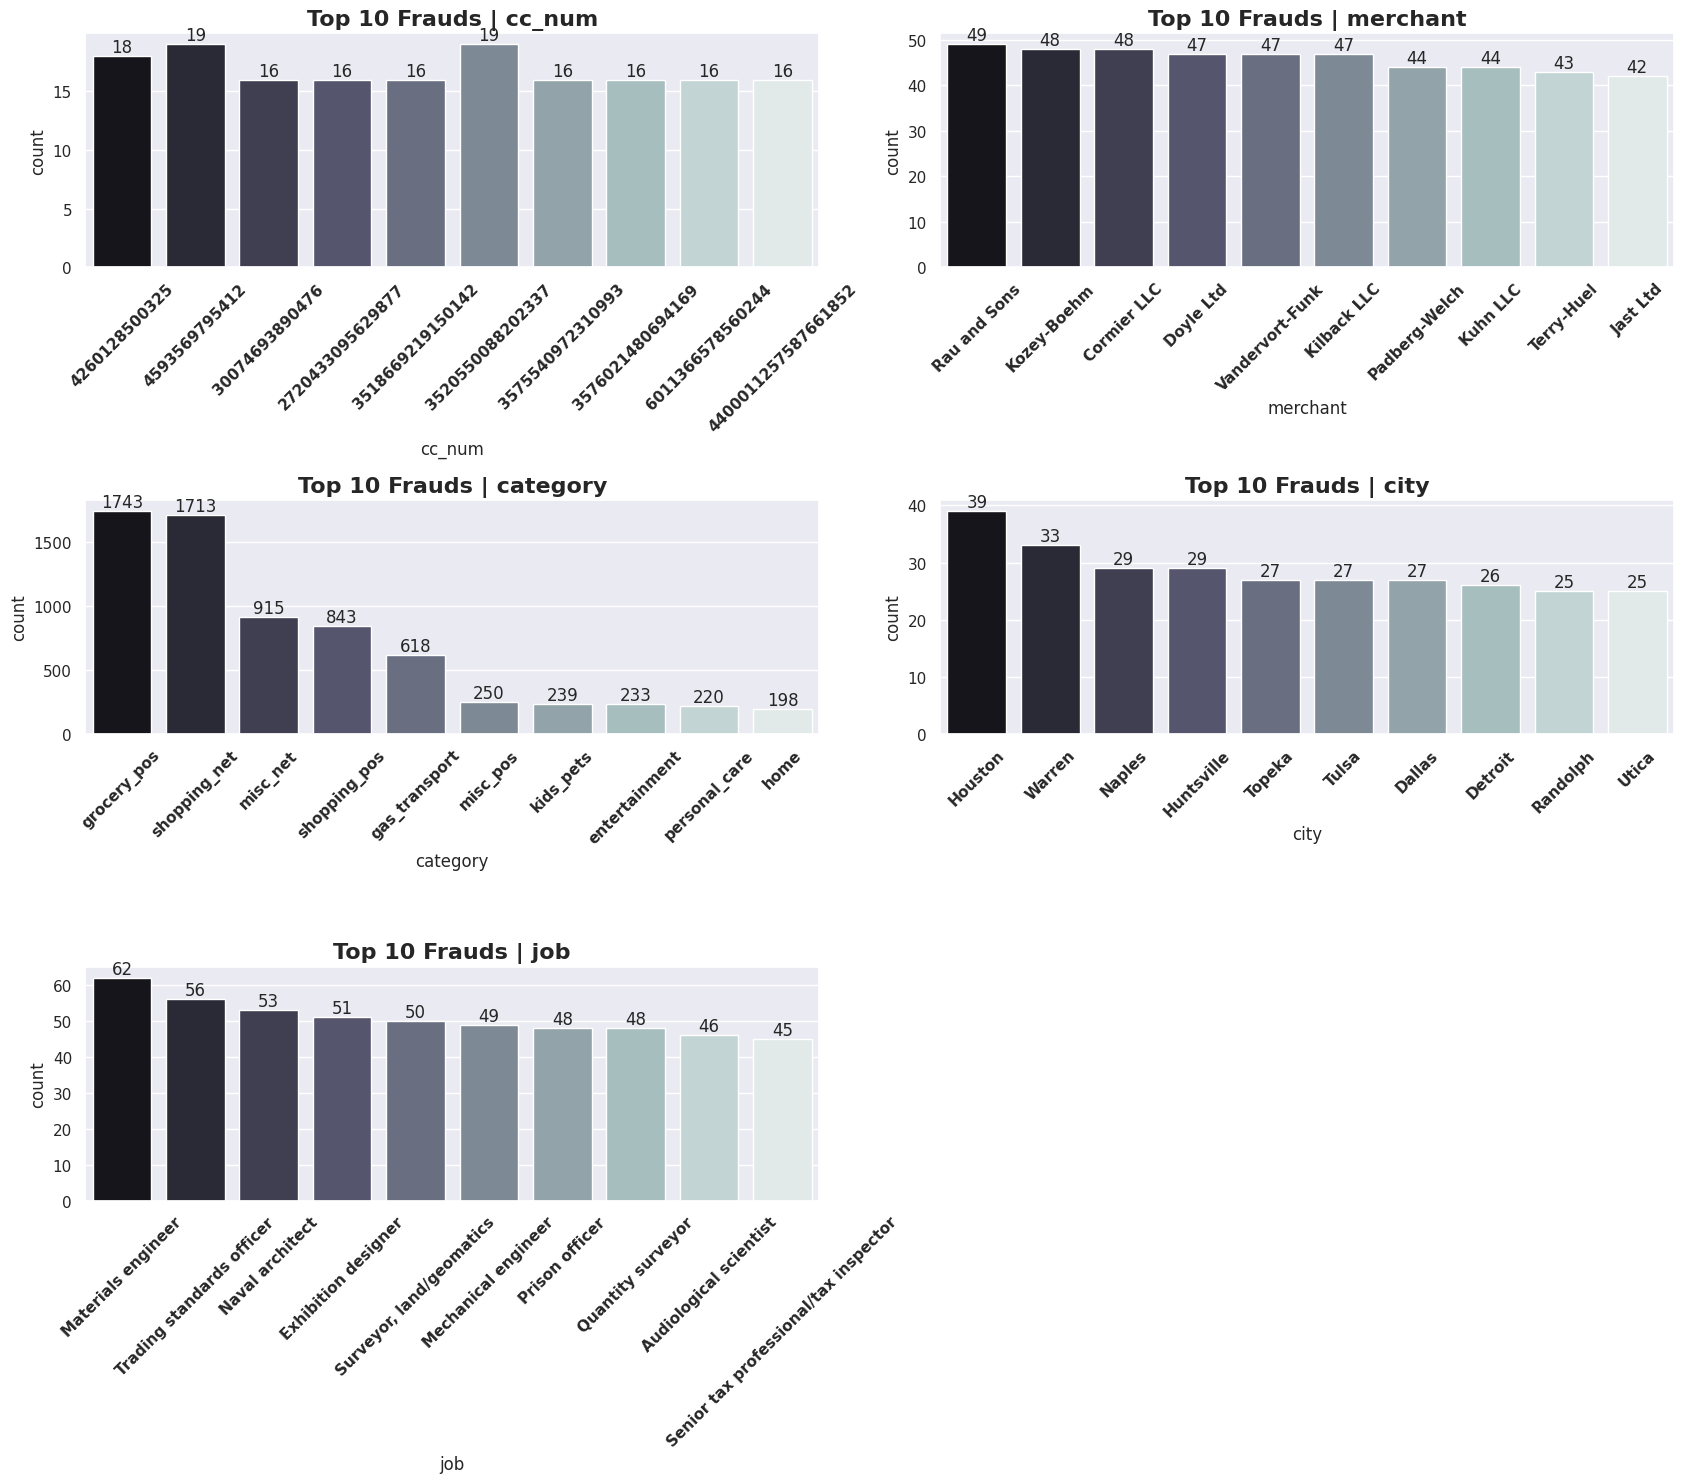

In [29]:
#Function to visualize determined data
def bar_plot(col):
    def top_frauds(col):
        return pd.DataFrame(data.loc[data['is_fraud']==1,[col]].value_counts()).reset_index().head(10)
    ax=sns.barplot(data=top_frauds(col),x=col,y='count',palette='bone')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 Frauds | {col}',fontsize=16,fontweight='bold')
    plt.xticks(rotation=45,fontweight='bold')
plt.figure(figsize=(17,15))
for idx,val in enumerate(['cc_num','merchant','category','city','job']):
    plt.subplot(3,2,idx+1)
    bar_plot(val)
plt.tight_layout()

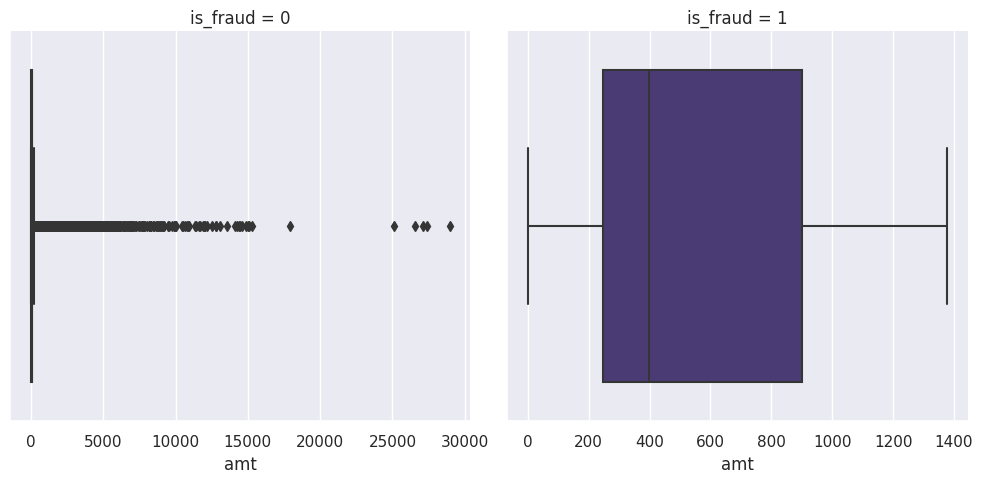

In [30]:
#Amount
sns.catplot(data=data,x='amt',col='is_fraud',kind='box',sharex=False)

- **We detect a huge number of outliers in the amounts of genuine transaction**
- **We will handle that in the scaling process since we can't remove them**
- **Because they represent real data**

gender
F    709863
M    586812
Name: count, dtype: int64


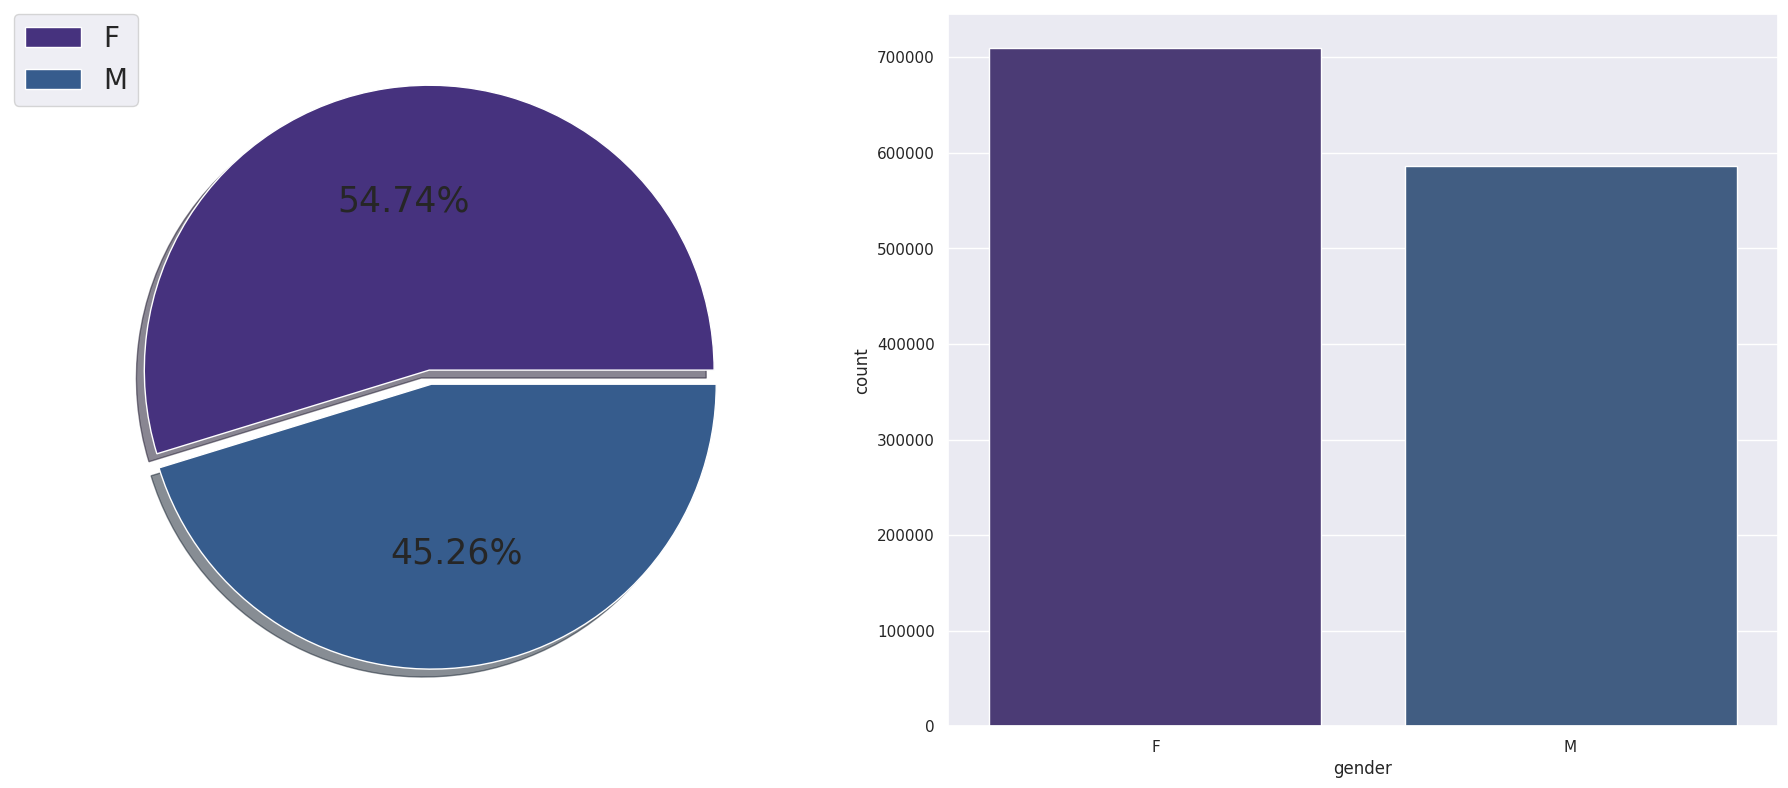

In [31]:
#Gender
pie_bar_plot('gender')

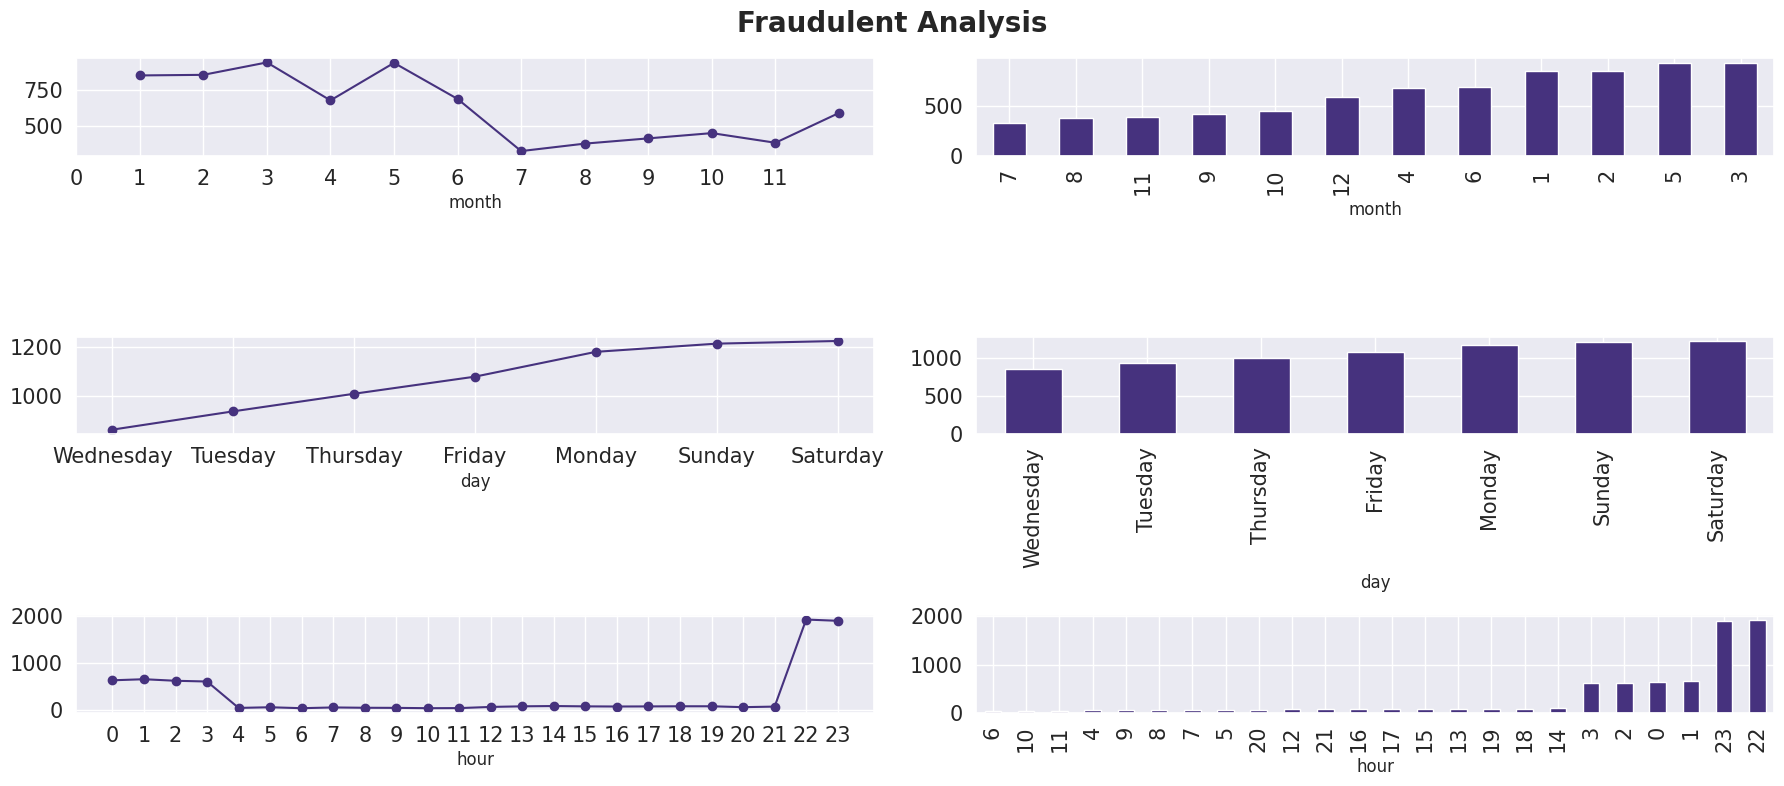

In [32]:
#What is the most month|day|hour frauds occur?
fig,axs = plt.subplots(3,2)
#Month
data.loc[data['is_fraud']==1,'month'].value_counts().sort_index().plot(kind='line',ax=axs[0,0],marker='o',fontsize=15)
axs[0,0].set_xticks(range(0,12))
data.loc[data['is_fraud']==1,'month'].value_counts(ascending=True).plot(kind='bar',ax=axs[0,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=18, fontweight='bold')
##Day
data.loc[data['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='line',ax=axs[1,0],marker='o',fontsize=15)
data.loc[data['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='bar',ax=axs[1,1],fontsize=15)
#Hour 
data.loc[data['is_fraud']==1,'hour'].value_counts().sort_index().plot(kind='line',ax=axs[2,0],marker='o',fontsize=15)
axs[2,0].set_xticks(range(0,24))
data.loc[data['is_fraud']==1,'hour'].value_counts(ascending=True).plot(kind='bar',ax=axs[2,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

## Conclusion:
- Basesd on the above representaion we conclude that,

**Most of the Fraud cases are recorded**
- in Month of March
- on Saturday
- at 10:00 PM.

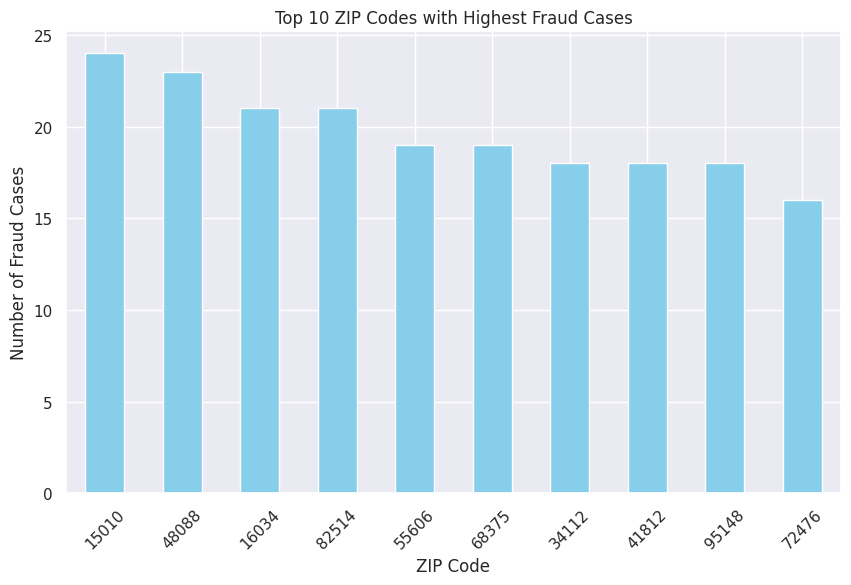

In [33]:
df_zip = data[data['is_fraud'] == 1].groupby('zip')['is_fraud'].count()
top_10_zip= df_zip.sort_values(ascending=False).head(10)
top_10_zip

plt.figure(figsize=(10, 6))
top_10_zip.plot(kind='bar', color='skyblue')
plt.title('Top 10 ZIP Codes with Highest Fraud Cases')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.show()

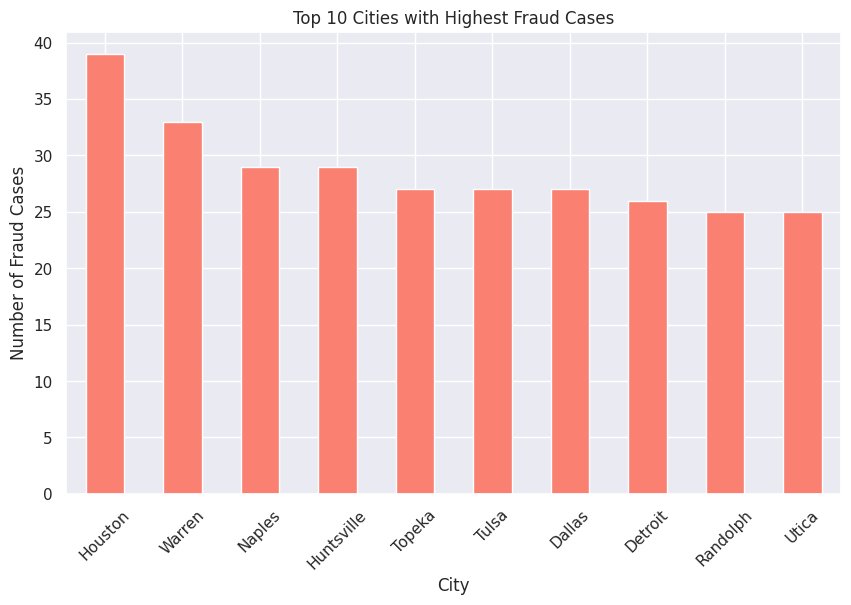

In [34]:
df_city = data[data['is_fraud'] == 1].groupby('city')['is_fraud'].count()
top_10_city= df_city.sort_values(ascending=False).head(10)
top_10_city

plt.figure(figsize=(10, 6))
top_10_city.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities with Highest Fraud Cases')
plt.xlabel('City')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.show()

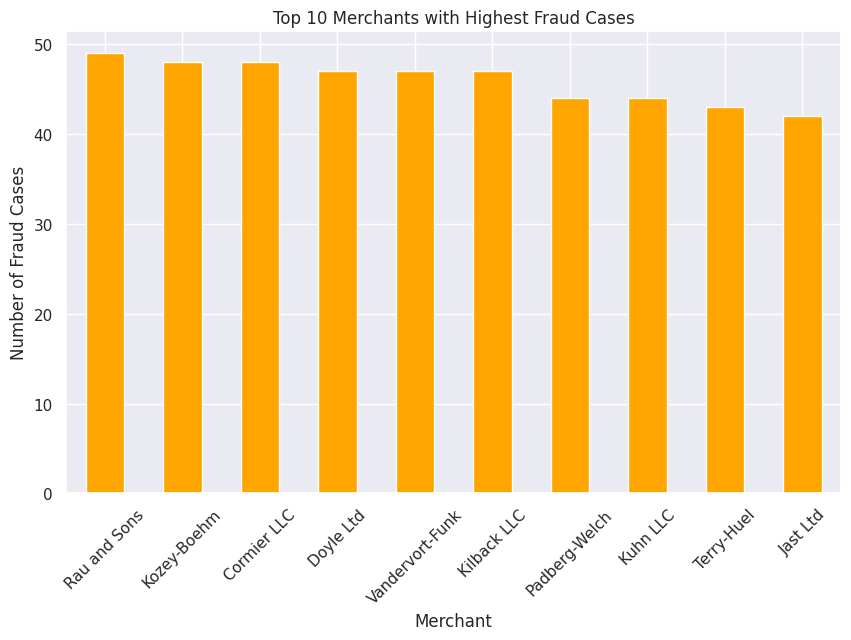

In [35]:
df_mer = data[data['is_fraud'] == 1].groupby('merchant')['is_fraud'].count()
top_10_mer= df_mer.sort_values(ascending=False).head(10)
top_10_mer

plt.figure(figsize=(10, 6))
top_10_mer.plot(kind='bar', color='orange')
plt.title('Top 10 Merchants with Highest Fraud Cases')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.show()


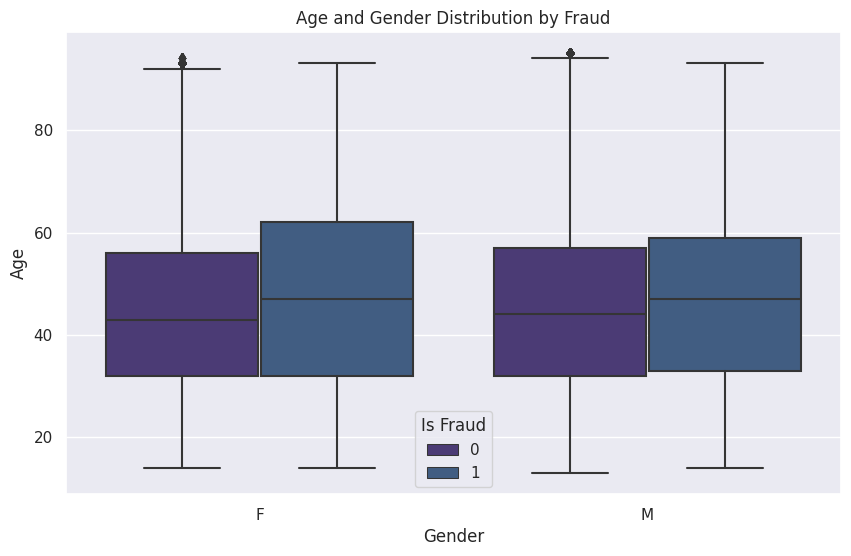

In [36]:
# Age and Gender Analysis
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=data)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

# Hypothesis Testing 1: Transaction Amount analysis


- **Null Hypothesis:** The null hypothesis (H0) is that there is no significant difference in the average transaction amount between fraudulent and non-fraudulent transactions.
- **The alternative hypothesis:** The alternate hypothesis (H1) is that there is a significant difference in the average transaction amount between fraudulent and non-fraudulent transactions.

In [37]:
# Assuming you have a DataFrame named 'data' with columns 'amt' and 'is_fraud'
# Replace this with your actual DataFrame and column names

# Extract transaction amounts for fraudulent and non-fraudulent transactions
fraudulent_amounts = data[data['is_fraud'] == 1]['amt']
non_fraudulent_amounts = data[data['is_fraud'] == 0]['amt']

# Perform a t-test assuming unequal variances (Welch's t-test)
t_statistic, p_value = stats.ttest_ind(fraudulent_amounts, non_fraudulent_amounts, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check for significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in transaction amounts between fraudulent and non-fraudulent transactions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in transaction amounts between fraudulent and non-fraudulent transactions.")

T-Statistic: 102.80470607258108
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in transaction amounts between fraudulent and non-fraudulent transactions.


**Interpretation:** 
- The p-value is 0.00,which is below the common significance level of 0.05. Therefore, we reject the null hypothesis (H0) that there is no difference in the mean transaction amounts between fraudulent and non-fraudulent transactions.

- This suggests that there is a statistically significant difference in the mean transaction amounts for fraudulent and non-fraudulent transactions.

**Conclusion**:
- The hypothesis test indicates that the mean transaction amounts are significantly different between fraudulent and non-fraudulent transactions, providing a potential characteristic to consider in predictive modeling.

# Hypothesis Testing 2: Temporal patterns of credit card fraud

- **The null hypothesis (H0)** is that there is no significant difference in the average transaction amount between fraudulent and non-fraudulent transactions.
- **The alternative hypothesis (H1)** is that there is a significant difference in the average transaction amount between fraudulent and non-fraudulent transactions.

In [38]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'data' with columns 'timestamp' and 'is_fraud'
# Replace this with your actual DataFrame and column names

# Extract relevant temporal information (e.g., day of the week)
data['trans_date_trans_time'] = data['trans_date_trans_time'].dt.day_name()

# Create a contingency table
contingency_table = pd.crosstab(data['trans_date_trans_time'], data['is_fraud'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Check for significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of fraudulent transactions across different days of the week.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of fraudulent transactions across different days of the week.")


Chi-Square Statistic: 185.5129009101617
P-Value: 2.2877424359174457e-37
Reject the null hypothesis: There is a significant difference in the distribution of fraudulent transactions across different days of the week.


**Interpretation:** 
- The p-value is 2.28,which is above the common significance level of 0.05. Therefore, we fail to reject the null hypothesis (H0) that there is no significant difference in the average transaction amount between fraudulent and non-fraudulent transactions.

- This suggests that there is no significant difference in the average transaction amount between fraudulent and non-fraudulent transactions.

# Hypothesis Testing 3: Significance of City Population on Fraud

- **Null hypothesis (H0):** is that there is does help us on the target

- **Alternate hypothesi (H1):** is that city_population does not help us on the target(is_fraud)

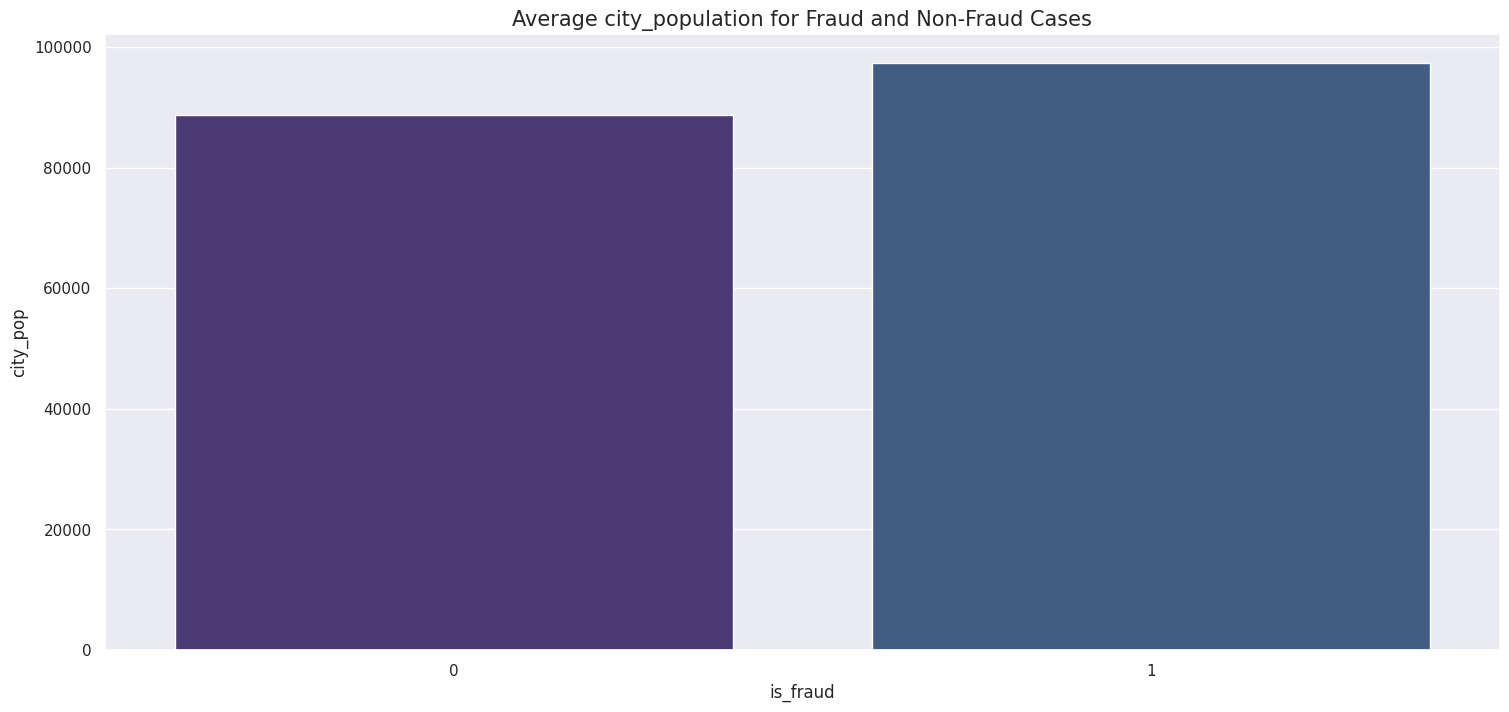

T-test: t-statistic = 2.432, p-value = 0.015, p-value<0.05? True


In [39]:
sns.barplot(data=data,x='is_fraud', y='city_pop', ci=None)
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = data[data['is_fraud'] == 1]['city_pop']
non_fraud_population = data[data['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')

**Intrepretation**:
- The p-value is 0.015,which is below the common significance level of 0.05. Therefore, we reject the null hypothesis (H0). 

**Conclusion**:
- Since we reject the null hypothesis,we conclude that ,
- city_population does not help us on the target(is_fraud), so we will drop it

# Feature Importance

is_fraud: 0.8976852159170827
amt: 0.09206440402713502
age: 0.0033492742693492115
city_pop: 0.002563941775704809
zip: 0.0016393634721721974
cc_num: 0.0015475321483351125
distance: 0.0011502683902210851


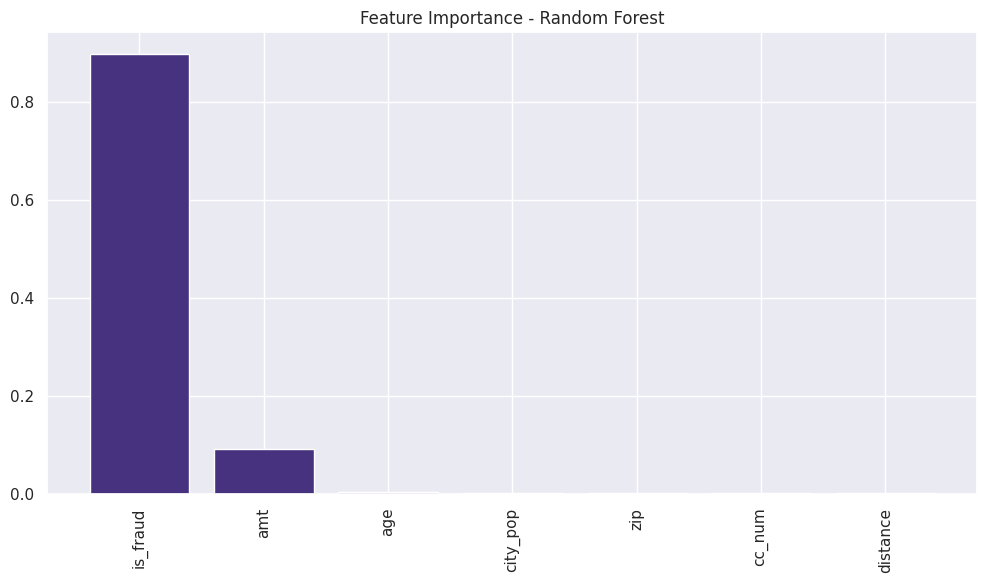

In [40]:
# Split the dataset into features (X) and the target variable (y)
# Assuming data is your DataFrame
#X = data.drop(['is_fraud', 'trans_date_trans_time', 'dob'], axis=1)  # Features
X = data.select_dtypes(include=['int64', 'float64'])
y = data['is_fraud']  # Target

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on your data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importance scores
for i, feature_index in enumerate(sorted_indices):
    print(f"{X.columns[feature_index]}: {feature_importances[feature_index]}")

# Plot feature importance scores
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices], rotation=90)
plt.show()


plt.show()



In [41]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'zip', 'city_pop', 'job', 'dob', 'is_fraud', 'hour',
       'day', 'month', 'distance', 'age'],
      dtype='object')

In [42]:
#Drop unecessary columns
data.drop(columns=['cc_num','trans_date_trans_time','city_pop'],inplace=True)

In [43]:
data.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'zip', 'job', 'dob',
       'is_fraud', 'hour', 'day', 'month', 'distance', 'age'],
      dtype='object')

#Drop unecessary columns
data.drop(columns=['dob','Above_Threshold'],inplace=True)

In [44]:
data.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'zip', 'job', 'dob',
       'is_fraud', 'hour', 'day', 'month', 'distance', 'age'],
      dtype='object')

In [45]:
#Reorder columns
data = data[['city','job','age','gender', 'zip', 'merchant', 'category',
         'distance',  'month','day','hour','amt','is_fraud']]
data.head()

,city,job,age,gender,zip,merchant,category,distance,month,day,hour,amt,is_fraud
0,Moravian Falls,"Psychologist, counselling",30,F,28654,"Rippin, Kub and Mann",misc_net,48.84,1,Tuesday,0,4.97,0
1,Orient,Special educational needs teacher,40,F,99160,"Heller, Gutmann and Zieme",grocery_pos,18.77,1,Tuesday,0,107.23,0
2,Malad City,Nature conservation officer,56,M,83252,Lind-Buckridge,entertainment,67.24,1,Tuesday,0,220.11,0
3,Boulder,Patent attorney,52,M,59632,"Kutch, Hermiston and Farrell",gas_transport,59.45,1,Tuesday,0,45.00,0
4,Doe Hill,Dance movement psychotherapist,32,M,24433,Keeling-Crist,misc_pos,48.19,1,Tuesday,0,41.96,0


In [46]:
#We will encode ('city','job','merchant', 'category') preparing for our model using WOE encoder
for col in ['gender', 'category', 'city', 'job', 'merchant', 'day']:
    data[col] = WOEEncoder().fit_transform(data[col],data['is_fraud'])

# Training the Models without Class Balancing

In [47]:

# Assuming you have a DataFrame named 'data' with the features and labels
# Replace this with your actual DataFrame and column names
# Set a random seed for reproducibility
random_seed = 42
# Select features (X) and labels (y)
X = data.drop('is_fraud', axis=1)  # Assuming 'is_fraud' is the target variable
y = data['is_fraud']

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Temporary set:", X_temp.shape, y_temp.shape)


Training set: (907672, 12) (907672,)
Testing set: (260632, 12) (260632,)
Validation set: (128371, 12) (128371,)
Temporary set: (389003, 12) (389003,)


In [48]:
# Take a sample of 100,000 from the temporary test set
sample_size_train = 300000
X_train_sample = X_train.sample(n=sample_size_train, random_state=random_seed)
print(X_train_sample.shape)
y_train_sample = y_train[X_train_sample.index]
print(y_train_sample.shape)
sample_size_test = 100000
X_test_sample = X_test.sample(n=sample_size_test, random_state=random_seed)
print(X_test_sample.shape)
y_test_sample = y_test[X_test_sample.index]
print(y_test_sample.shape)
sample_size_validation = 40000
X_val_sample = X_val.sample(n=sample_size_validation, random_state=random_seed)
print(X_val_sample.shape)
y_val_sample = y_val[X_val_sample.index]
print(y_val_sample.shape)

(300000, 12)
(300000,)
(100000, 12)
(100000,)
(40000, 12)
(40000,)


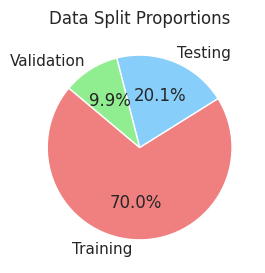

In [49]:
import matplotlib.pyplot as plt

# Calculate proportions
total_samples = len(data)
train_size = len(X_train)
test_size = len(X_test)
val_size = len(X_val)

# Calculate percentages
train_percentage = (train_size / total_samples) * 100
test_percentage = (test_size / total_samples) * 100
val_percentage = (val_size / total_samples) * 100

# Data for the pie chart
sizes = [train_percentage, test_percentage, val_percentage]
labels = ['Training', 'Testing', 'Validation']
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Data Split Proportions')
plt.show()


In [50]:
# Feature scaling
scaler = StandardScaler()
numerical_cols = ['amt', 'age', 'zip','distance', 'month', 'hour']
scaled_train_features = scaler.fit_transform(data[numerical_cols])
#scaled_test_features = scaler.transform(test_data[numerical_cols])

In [51]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=random_seed)
logistic_regression.fit(X_train, y_train)

# Predict on training set
y_train_pred_lr = logistic_regression.predict(X_train)

# Predict on validation set
y_val_pred_lr = logistic_regression.predict(X_val)  # Use the test sample for validation

# Predict on test set
y_test_pred_lr = logistic_regression.predict(X_test)


# Evaluate the model on training set
print("\nLogistic Regression for Training data")
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print("Classification Report (Training):")
print(classification_report(y_train, y_train_pred_lr))


Logistic Regression for Training data

Training Accuracy: 0.9945
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    902451
           1       0.64      0.11      0.19      5221

    accuracy                           0.99    907672
   macro avg       0.82      0.56      0.59    907672
weighted avg       0.99      0.99      0.99    907672



In [53]:
# Evaluate the model
print("Logistic Regression for Test data")

# Evaluation on Test Set
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_lr))

print("---------------------------------")

# Evaluate the model
print("Logistic Regression for Validation data")

# Evaluation on Test Set
validation_accuracy = accuracy_score(y_val, y_val_pred_lr)
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_val, y_val_pred_lr))

Logistic Regression for Test data

Test Accuracy: 0.9945
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    259145
           1       0.62      0.11      0.19      1487

    accuracy                           0.99    260632
   macro avg       0.81      0.56      0.59    260632
weighted avg       0.99      0.99      0.99    260632

---------------------------------
Logistic Regression for Validation data

Validation Accuracy: 0.8597
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    127573
           1       0.03      0.71      0.06       798

    accuracy                           0.86    128371
   macro avg       0.51      0.79      0.49    128371
weighted avg       0.99      0.86      0.92    128371




Confusion Matrix (Test):
[[259043    102]
 [  1321    166]]

Confusion Matrix (Training):
[[902120    331]
 [  4639    582]]


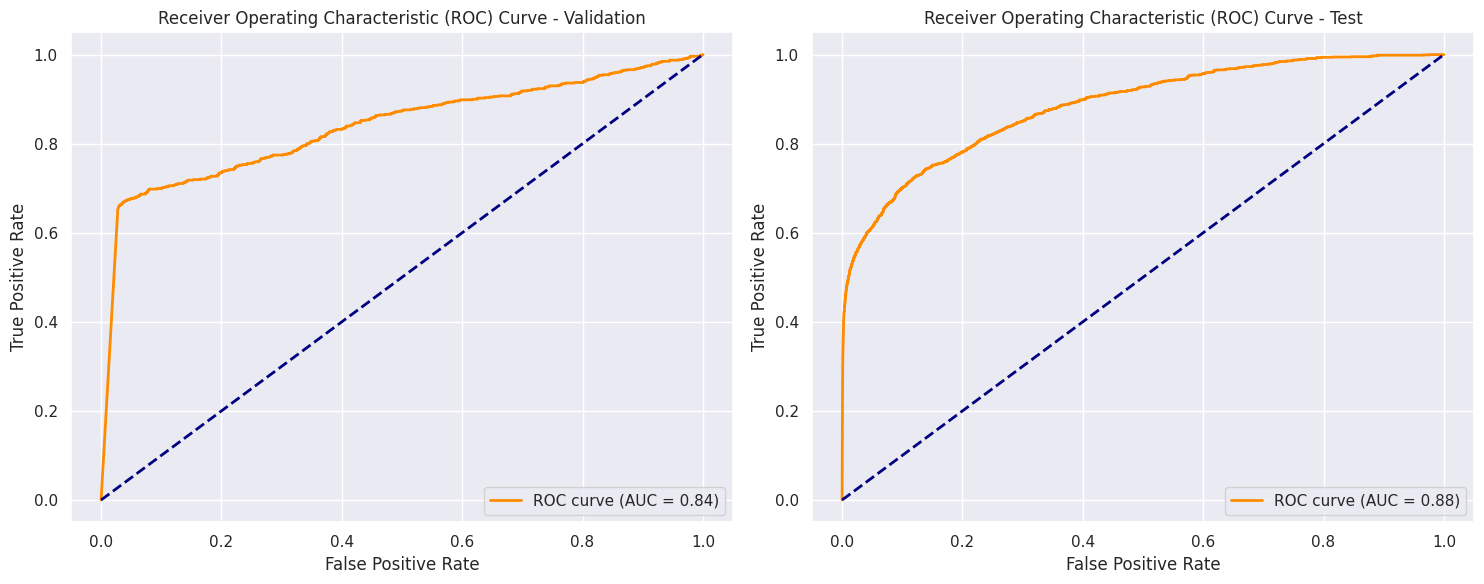

In [54]:
# Confusion Matrix for Test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred_lr)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test)

# Confusion Matrix for Training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred_lr)
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)

# ROC Curve for Validation set
fpr_val, tpr_val, _ = roc_curve(y_val, logistic_regression.predict_proba(X_val)[:, 1])
roc_auc_val = roc_auc_score(y_val, logistic_regression.predict_proba(X_val)[:, 1])

# ROC Curve for Test set
fpr_test, tpr_test, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])
roc_auc_test = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])

# Plot both ROC curves as subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ROC Curve - Validation
axes[0].plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve - Validation')
axes[0].legend(loc='lower right')

# ROC Curve - Test
axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve - Test')
axes[1].legend(loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()

In [55]:
# Random Forest
random_forest = RandomForestClassifier(random_state=random_seed)
random_forest.fit(X_train, y_train)

# Predict on training set
y_train_pred_rf = random_forest.predict(X_train)

# Predict on validation set
y_val_pred_rf = random_forest.predict(X_val)  # Use the test sample for validation

# Predict on test set
y_test_pred_rf = random_forest.predict(X_test)


# Evaluate the model on training set
print("\Random Forest for Training data")
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print("Classification Report (Training):")
print(classification_report(y_train, y_train_pred_rf))


\Random Forest for Training data

Training Accuracy: 1.0000
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902451
           1       1.00      1.00      1.00      5221

    accuracy                           1.00    907672
   macro avg       1.00      1.00      1.00    907672
weighted avg       1.00      1.00      1.00    907672



In [56]:
# Evaluate the model
print("Random Forest for Test data")

# Evaluation on Test Set
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_rf))

print("---------------------------------")

# Evaluate the model
print("Random Forest for Validation data")

# Evaluation on Test Set
validation_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_val, y_val_pred_rf))

Random Forest for Test data

Test Accuracy: 0.9985
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    259145
           1       0.97      0.75      0.85      1487

    accuracy                           1.00    260632
   macro avg       0.99      0.88      0.92    260632
weighted avg       1.00      1.00      1.00    260632

---------------------------------
Random Forest for Validation data

Validation Accuracy: 0.9453
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    127573
           1       0.01      0.08      0.02       798

    accuracy                           0.95    128371
   macro avg       0.50      0.51      0.49    128371
weighted avg       0.99      0.95      0.97    128371




Confusion Matrix (Test):
[[259114     31]
 [   368   1119]]

Confusion Matrix (Training):
[[902451      0]
 [     1   5220]]


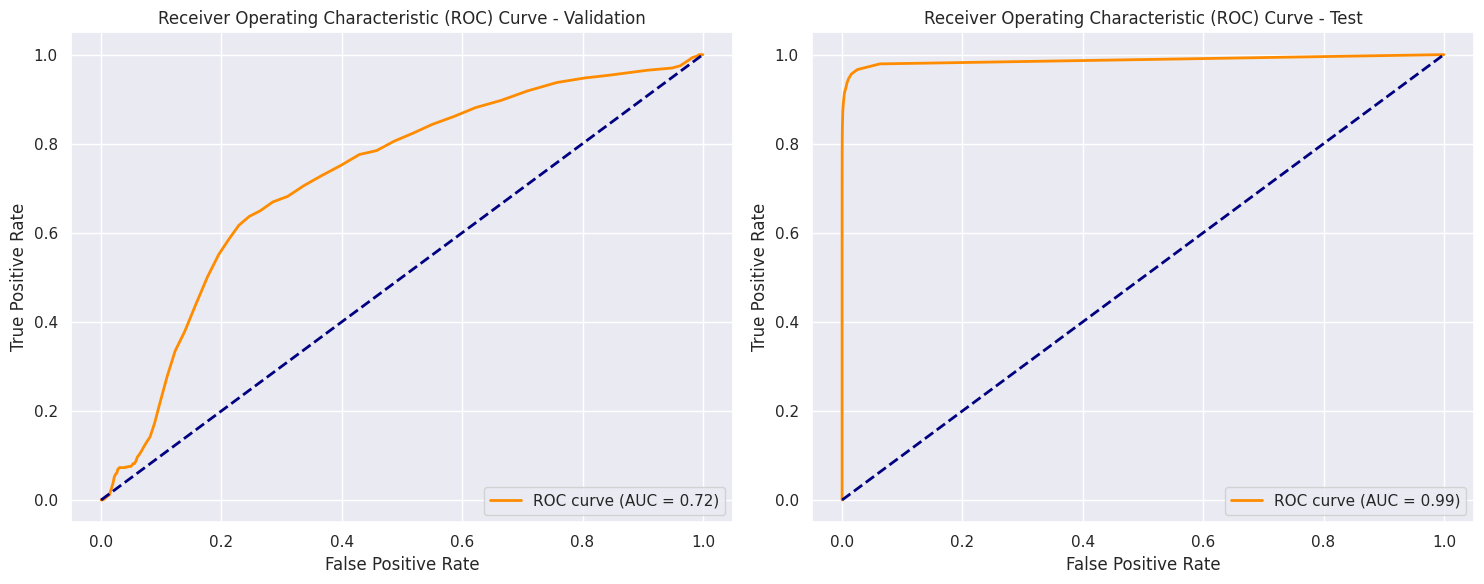

In [57]:
# Confusion Matrix for Test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred_rf)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test)

# Confusion Matrix for Training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred_rf)
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)

# ROC Curve for Validation set
fpr_val, tpr_val, _ = roc_curve(y_val, random_forest.predict_proba(X_val)[:, 1])
roc_auc_val = roc_auc_score(y_val, random_forest.predict_proba(X_val)[:, 1])

# ROC Curve for Test set
fpr_test, tpr_test, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
roc_auc_test = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

# Plot both ROC curves as subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ROC Curve - Validation
axes[0].plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve - Validation')
axes[0].legend(loc='lower right')

# ROC Curve - Test
axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve - Test')
axes[1].legend(loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()

In [58]:
# Support Vector Machine (SVM)
svm_classifier = SVC(probability=True, random_state=random_seed)
svm_classifier.fit(X_train_sample, y_train_sample)

# Predict on training set
y_train_pred_svm = svm_classifier.predict(X_train_sample)

# Predict on validation set
y_val_pred_svm = svm_classifier.predict(X_val_sample)  # Use the test sample for validation

# Predict on test set
y_test_pred_svm = svm_classifier.predict(X_test_sample)


# Evaluate the model on training set
print("\Support Vector Machine for Training data")
train_accuracy = accuracy_score(y_train_sample, y_train_pred_svm)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print("Classification Report (Training):")
print(classification_report(y_train_sample, y_train_pred_svm))


\Support Vector Machine for Training data

Training Accuracy: 0.9944
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    298316
           1       0.00      0.00      0.00      1684

    accuracy                           0.99    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       0.99      0.99      0.99    300000



In [59]:
# Evaluate the model
print("Support Vector Machine for Test data")

# Evaluation on Test Set
test_accuracy = accuracy_score(y_test_sample, y_test_pred_svm)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test_sample, y_test_pred_svm))

print("---------------------------------")

# Evaluate the model
print("Support Vector Machine for Validation data")

# Evaluation on Test Set
validation_accuracy = accuracy_score(y_val_sample, y_val_pred_svm)
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_val_sample, y_val_pred_svm))

Support Vector Machine for Test data

Test Accuracy: 0.9942
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     99418
           1       0.00      0.00      0.00       582

    accuracy                           0.99    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.99      0.99      0.99    100000

---------------------------------
Support Vector Machine for Validation data

Validation Accuracy: 0.9935
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39738
           1       0.00      0.00      0.00       262

    accuracy                           0.99     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.99      0.99      0.99     40000




Confusion Matrix (Test):
[[99418     0]
 [  582     0]]

Confusion Matrix (Training):
[[298316      0]
 [  1684      0]]


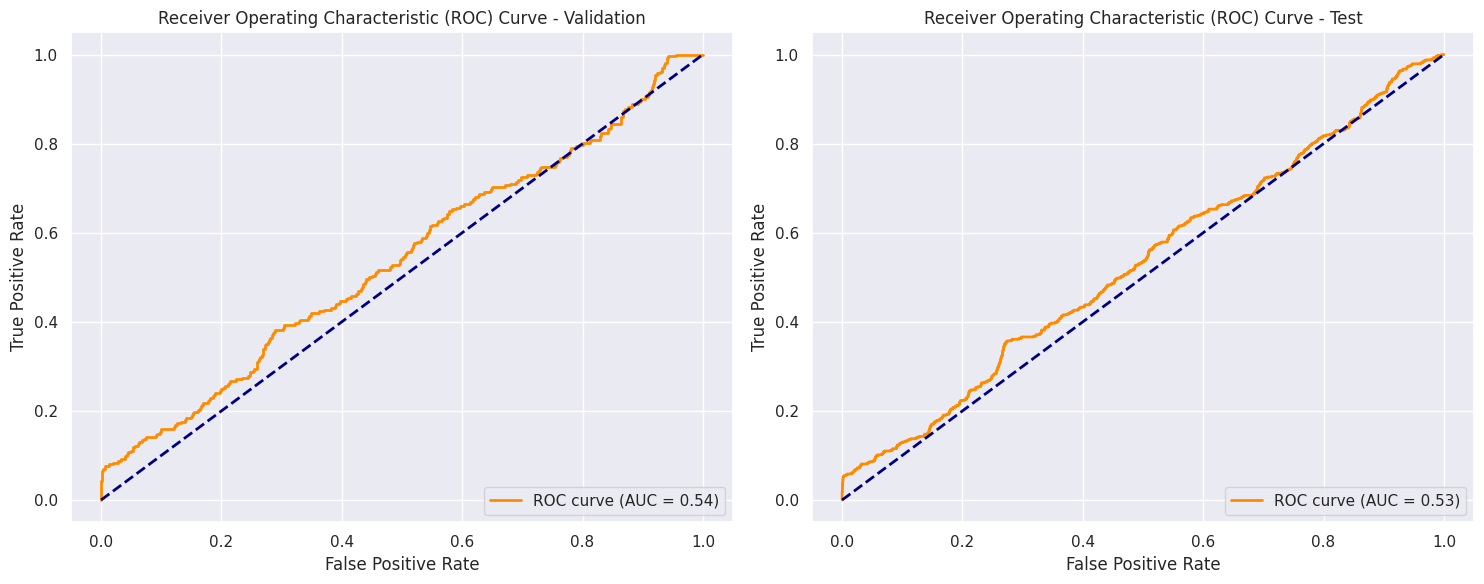

In [60]:
# Confusion Matrix for Test set
conf_matrix_test = confusion_matrix(y_test_sample, y_test_pred_svm)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test)

# Confusion Matrix for Training set
conf_matrix_train = confusion_matrix(y_train_sample, y_train_pred_svm)
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)

# ROC Curve for Validation set
fpr_val, tpr_val, _ = roc_curve(y_val_sample, svm_classifier.predict_proba(X_val_sample)[:, 1])
roc_auc_val = roc_auc_score(y_val_sample, svm_classifier.predict_proba(X_val_sample)[:, 1])

# ROC Curve for Test set
fpr_test, tpr_test, _ = roc_curve(y_test_sample, svm_classifier.predict_proba(X_test_sample)[:, 1])
roc_auc_test = roc_auc_score(y_test_sample, svm_classifier.predict_proba(X_test_sample)[:, 1])

# Plot both ROC curves as subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ROC Curve - Validation
axes[0].plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve - Validation')
axes[0].legend(loc='lower right')

# ROC Curve - Test
axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve - Test')
axes[1].legend(loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()

In [61]:
# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_sample, y_train_sample)

# Predict on training set
y_train_pred_knn = knn_classifier.predict(X_train_sample)

# Predict on validation set
y_val_pred_knn = knn_classifier.predict(X_val_sample)  # Use the test sample for validation

# Predict on test set
y_test_pred_knn = knn_classifier.predict(X_test_sample)


# Evaluate the model on training set
print("\Support Vector Machine for Training data")
train_accuracy = accuracy_score(y_train_sample, y_train_pred_knn)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print("Classification Report (Training):")
print(classification_report(y_train_sample, y_train_pred_knn))

\Support Vector Machine for Training data

Training Accuracy: 0.9955
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    298316
           1       0.73      0.33      0.45      1684

    accuracy                           1.00    300000
   macro avg       0.86      0.66      0.72    300000
weighted avg       0.99      1.00      0.99    300000



In [62]:
# Evaluate the model
print("K Nearest Neigbour for Test data")

# Evaluation on Test Set
test_accuracy = accuracy_score(y_test_sample, y_test_pred_knn)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test_sample, y_test_pred_svm))

print("---------------------------------")

# Evaluate the model
print("K Nearest Neigbour for Validation data")

# Evaluation on Test Set
validation_accuracy = accuracy_score(y_val_sample, y_val_pred_knn)
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print("Classification Report (Test):")
print(classification_report(y_val_sample, y_val_pred_svm))

K Nearest Neigbour for Test data

Test Accuracy: 0.9942
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     99418
           1       0.00      0.00      0.00       582

    accuracy                           0.99    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.99      0.99      0.99    100000

---------------------------------
K Nearest Neigbour for Validation data

Validation Accuracy: 0.9939
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39738
           1       0.00      0.00      0.00       262

    accuracy                           0.99     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.99      0.99      0.99     40000




Confusion Matrix (Test):
[[99307   111]
 [  470   112]]

Confusion Matrix (Training):
[[298109    207]
 [  1136    548]]


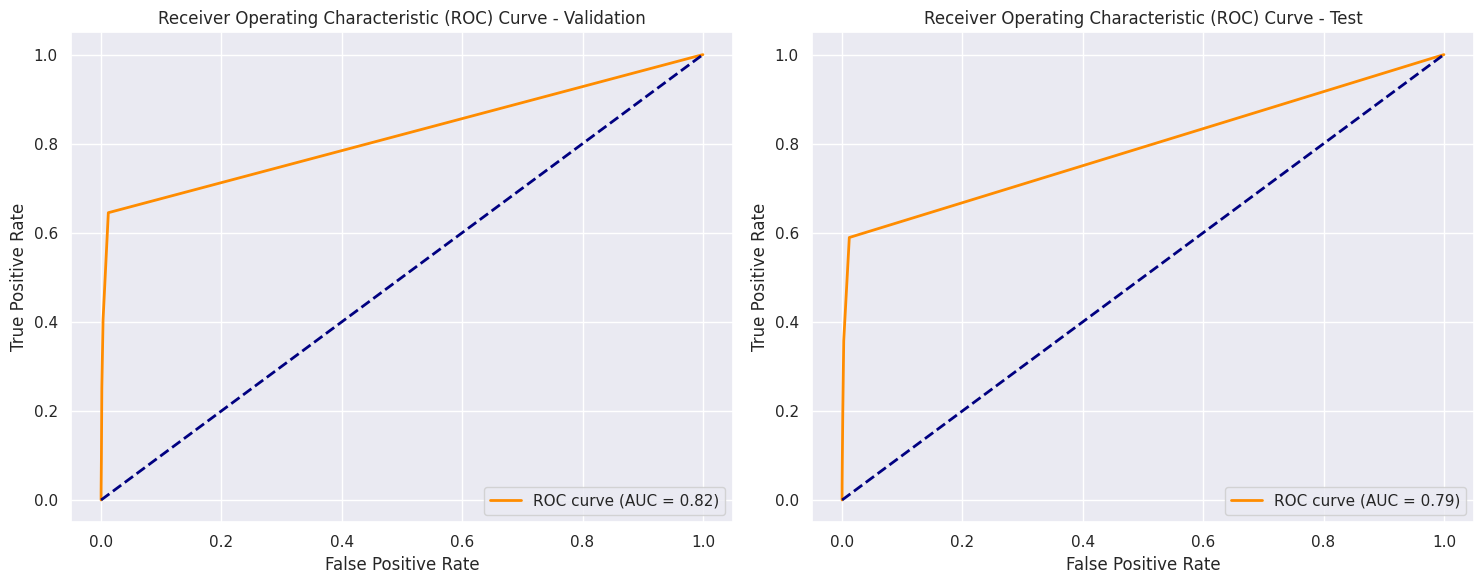

In [63]:
# Confusion Matrix for Test set
conf_matrix_test = confusion_matrix(y_test_sample, y_test_pred_knn)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test)

# Confusion Matrix for Training set
conf_matrix_train = confusion_matrix(y_train_sample, y_train_pred_knn)
print("\nConfusion Matrix (Training):")
print(conf_matrix_train)

# ROC Curve for Validation set
fpr_val, tpr_val, _ = roc_curve(y_val_sample, knn_classifier.predict_proba(X_val_sample)[:, 1])
roc_auc_val = roc_auc_score(y_val_sample, knn_classifier.predict_proba(X_val_sample)[:, 1])

# ROC Curve for Test set
fpr_test, tpr_test, _ = roc_curve(y_test_sample, knn_classifier.predict_proba(X_test_sample)[:, 1])
roc_auc_test = roc_auc_score(y_test_sample, knn_classifier.predict_proba(X_test_sample)[:, 1])

# Plot both ROC curves as subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ROC Curve - Validation
axes[0].plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve - Validation')
axes[0].legend(loc='lower right')

# ROC Curve - Test
axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve - Test')
axes[1].legend(loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()

# With PCA

In [64]:
df1 = pd.read_csv("/kaggle/input/fraudtrain/fraudTrain.csv")
df1.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [65]:
#Change date type
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'],format='mixed')
df1['hour'] = df1['trans_date_trans_time'].dt.hour
df1['day'] = df1['trans_date_trans_time'].dt.day_name()
df1['month'] = df1['trans_date_trans_time'].dt.month

In [66]:
#Location between customer home and merchant
df1['distance'] = df1.apply(lambda col : round(great_circle((col['lat'],col['long']),
                                         (col['merch_lat'],col['merch_long'])).miles,2),axis=1)

In [67]:
# Age and Gender Analysis
df1['dob'] = pd.to_datetime(df1['dob'])
df1['age'] = (df1['trans_date_trans_time'] - df1['dob']).dt.days // 365

In [68]:
df1.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'month',
       'distance', 'age'],
      dtype='object')

In [69]:
df1.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'street', 'state','first','last','trans_num','unix_time', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long' ],inplace=True)

In [70]:
df1.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'zip', 'job',
       'is_fraud', 'hour', 'day', 'month', 'distance', 'age'],
      dtype='object')

In [71]:
df1.shape

(1296675, 13)

In [72]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame

# Select the first 10,000 rows
df1_subset = df1.head(100000)

# Separate numerical and categorical columns
numerical_columns = ['amt', 'age', 'zip','distance', 'month', 'hour']
categorical_columns = ['gender', 'category', 'city', 'job', 'merchant', 'day']

# Extract the relevant columns
df_numerical = df1_subset[numerical_columns]
df_categorical = df1_subset[categorical_columns]

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' removes the first category to avoid multicollinearity
encoded_categorical = encoder.fit_transform(df_categorical)

# Concatenate numerical and encoded categorical columns
df_combined = pd.concat([df_numerical, pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))], axis=1)

# Perform PCA with the same number of components as the total number of features
pca = PCA(n_components=min(len(df_combined.columns), 12))  # Set the number of components to 13
pca_result = pca.fit_transform(df_combined)

# Display the resulting DataFrame with PCA columns named 'PCA_1' through 'PCA_13'
pca_columns = [f'PCA_{i+1}' for i in range(pca_result.shape[1])]
pca_result_df = pd.DataFrame(pca_result, columns=pca_columns)

# Add the target variable 'is_fraud' back to the PCA result
pca_result_df['is_fraud'] = df1_subset['is_fraud']

# Display the resulting DataFrame
print(pca_result_df.head())


          PCA_1       PCA_2      PCA_3      PCA_4      PCA_5     PCA_6  \
0 -20066.505321  -67.443686  -3.187684 -13.432691 -13.952340 -0.747015   
1  50439.491976   36.694963  27.901450  -7.895632 -13.257247 -0.716314   
2  34531.489218  149.101488 -18.201942  14.388000 -11.775477 -0.387978   
3  10911.493813  -26.623842 -10.897965   9.456892 -12.244476 -0.397203   
4 -24287.506284  -30.567086  -2.312672 -11.465150 -13.751621 -0.404356   

      PCA_7     PCA_8     PCA_9    PCA_10    PCA_11    PCA_12  is_fraud  
0 -0.291146  0.697084 -0.267204 -0.178588  0.047094 -0.022693         0  
1 -0.211131  0.694899 -0.263680 -0.168082  0.015636 -0.080591         0  
2  0.724589  0.697137 -0.279280 -0.203017  0.059561 -0.013271         0  
3  0.677338  0.698360 -0.281892 -0.203576  0.086585  0.047029         0  
4  0.664615  0.706718 -0.281032 -0.201643  0.051995 -0.014707         0  


In [73]:
# Get the loadings for each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings.T, columns=pca_columns, index=df_combined.columns)

# Display the loadings
print(loadings_df)


                      PCA_1     PCA_2         PCA_3     PCA_4     PCA_5  \
amt           -2.646250e-05  0.999999 -6.100860e-04  0.001026  0.000991   
age            8.500203e-06 -0.001014  1.279212e-01  0.988663  0.078526   
zip            1.000000e+00  0.000026  7.141057e-07 -0.000009 -0.000002   
distance       1.821001e-06 -0.000738 -9.917463e-01  0.128205  0.001439   
month          5.650457e-08  0.000008  3.242319e-05  0.000087 -0.000506   
...                     ...       ...           ...       ...       ...   
day_Saturday  -6.679438e-08 -0.000006  6.003543e-06  0.000079  0.000080   
day_Sunday    -3.074751e-08 -0.000006 -3.659870e-05 -0.000038 -0.000181   
day_Thursday   4.078294e-08  0.000003 -9.233617e-06  0.000128 -0.000571   
day_Tuesday    5.223633e-08  0.000002  9.585089e-05  0.000062  0.000518   
day_Wednesday  6.388920e-08  0.000002  7.054361e-06  0.000101 -0.000069   

                      PCA_6         PCA_7         PCA_8         PCA_9  \
amt           -7.715499e-0

In [74]:
loadings_pca_1 = loadings_df['PCA_1']
print(loadings_pca_1)

amt             -2.646250e-05
age              8.500203e-06
zip              1.000000e+00
distance         1.821001e-06
month            5.650457e-08
                     ...     
day_Saturday    -6.679438e-08
day_Sunday      -3.074751e-08
day_Thursday     4.078294e-08
day_Tuesday      5.223633e-08
day_Wednesday    6.388920e-08
Name: PCA_1, Length: 2043, dtype: float64


**Certainly! Looking at the loadings for PCA_1, the original feature with the highest absolute loading is the one most strongly associated with PCA_1. In the provided loadings, it looks like the 'zip' column has a loading of 1.000000e+00, which means it has a perfect correlation with PCA_1.**

In [75]:
pca_result_df.columns

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'is_fraud'],
      dtype='object')

In [76]:
pca_result_df.rename(columns={'PCA_1': 'zip', 'PCA_2': 'amt', 'PCA_3': 'month', 'PCA_4': 'distance', 'PCA_5': 'age', 'PCA_6': 'merchant', 'PCA_7': 'category', 'PCA_8': 'gender', 'PCA_9': 'city', 'PCA_10': 'job','PCA_11': 'hour','PCA_12': 'day'}, inplace=True)
pca_result_df.columns

Index(['zip', 'amt', 'month', 'distance', 'age', 'merchant', 'category',
       'gender', 'city', 'job', 'hour', 'day', 'is_fraud'],
      dtype='object')

In [77]:
pca_result_df.head(5)

,zip,amt,month,distance,age,merchant,category,gender,city,job,hour,day,is_fraud
0,-20066.505321,-67.443686,-3.187684,-13.432691,-13.952340,-0.747015,-0.291146,0.697084,-0.267204,-0.178588,0.047094,-0.022693,0
1,50439.491976,36.694963,27.901450,-7.895632,-13.257247,-0.716314,-0.211131,0.694899,-0.263680,-0.168082,0.015636,-0.080591,0
2,34531.489218,149.101488,-18.201942,14.388000,-11.775477,-0.387978,0.724589,0.697137,-0.279280,-0.203017,0.059561,-0.013271,0
3,10911.493813,-26.623842,-10.897965,9.456892,-12.244476,-0.397203,0.677338,0.698360,-0.281892,-0.203576,0.086585,0.047029,0
4,-24287.506284,-30.567086,-2.312672,-11.465150,-13.751621,-0.404356,0.664615,0.706718,-0.281032,-0.201643,0.051995,-0.014707,0


In [78]:
# Check the class distribution
class_distribution = pca_result_df['is_fraud'].value_counts()
print(class_distribution)

is_fraud
0    99010
1      990
Name: count, dtype: int64


In [79]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(pca_result_df['is_fraud'].value_counts()[0]/len(pca_result_df) * 100,2), '% of the dataset')
print('Frauds', round(pca_result_df['is_fraud'].value_counts()[1]/len(pca_result_df) * 100,2), '% of the dataset')

No Frauds 99.01 % of the dataset
Frauds 0.99 % of the dataset


In [80]:
pca_result_df.describe()

,zip,amt,month,distance,age,merchant,category,gender,city,job,hour,day,is_fraud
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,-5.714828e-12,1.930403e-15,7.692051e-15,-7.541985e-15,3.092282e-16,-7.730705e-17,3.893774e-16,-3.918643e-17,1.023182e-17,3.751666e-17,4.888534e-17,5.343281e-17,0.009900
std,2.689549e+04,1.458938e+02,1.800665e+01,1.741893e+01,6.708117e+00,5.015256e-01,4.993155e-01,4.482084e-01,4.183751e-01,3.691591e-01,3.325681e-01,3.232966e-01,0.099005
min,-4.746351e+04,-7.213164e+01,-4.539261e+01,-3.702302e+01,-1.527903e+01,-7.552780e-01,-7.302801e-01,-6.974832e-01,-6.245531e-01,-5.608119e-01,-7.217683e-01,-5.894531e-01,0.000000
25%,-2.267951e+04,-6.198250e+01,-1.378564e+01,-1.333280e+01,-5.299989e+00,-5.148274e-01,-5.193209e-01,-2.106440e-01,-2.964836e-01,-2.383221e-01,-4.647589e-02,-8.147729e-02,0.000000
50%,-5.465094e+02,-2.378879e+01,-1.221196e+00,-2.109340e+00,6.115769e-01,-1.789791e-01,-2.240346e-01,-9.554987e-02,7.485052e-02,-1.621871e-01,1.400693e-02,-2.144043e-02,0.000000
75%,2.329049e+04,1.194717e+01,1.276053e+01,1.093707e+01,5.555211e+00,4.154840e-01,4.144853e-01,4.998271e-02,1.613981e-01,3.921661e-01,5.718106e-02,5.302456e-03,0.000000
max,5.106250e+04,1.271513e+04,5.220372e+01,5.411817e+01,2.055681e+01,7.928431e-01,8.090890e-01,8.763527e-01,7.618158e-01,6.354222e-01,8.219366e-01,9.015415e-01,1.000000


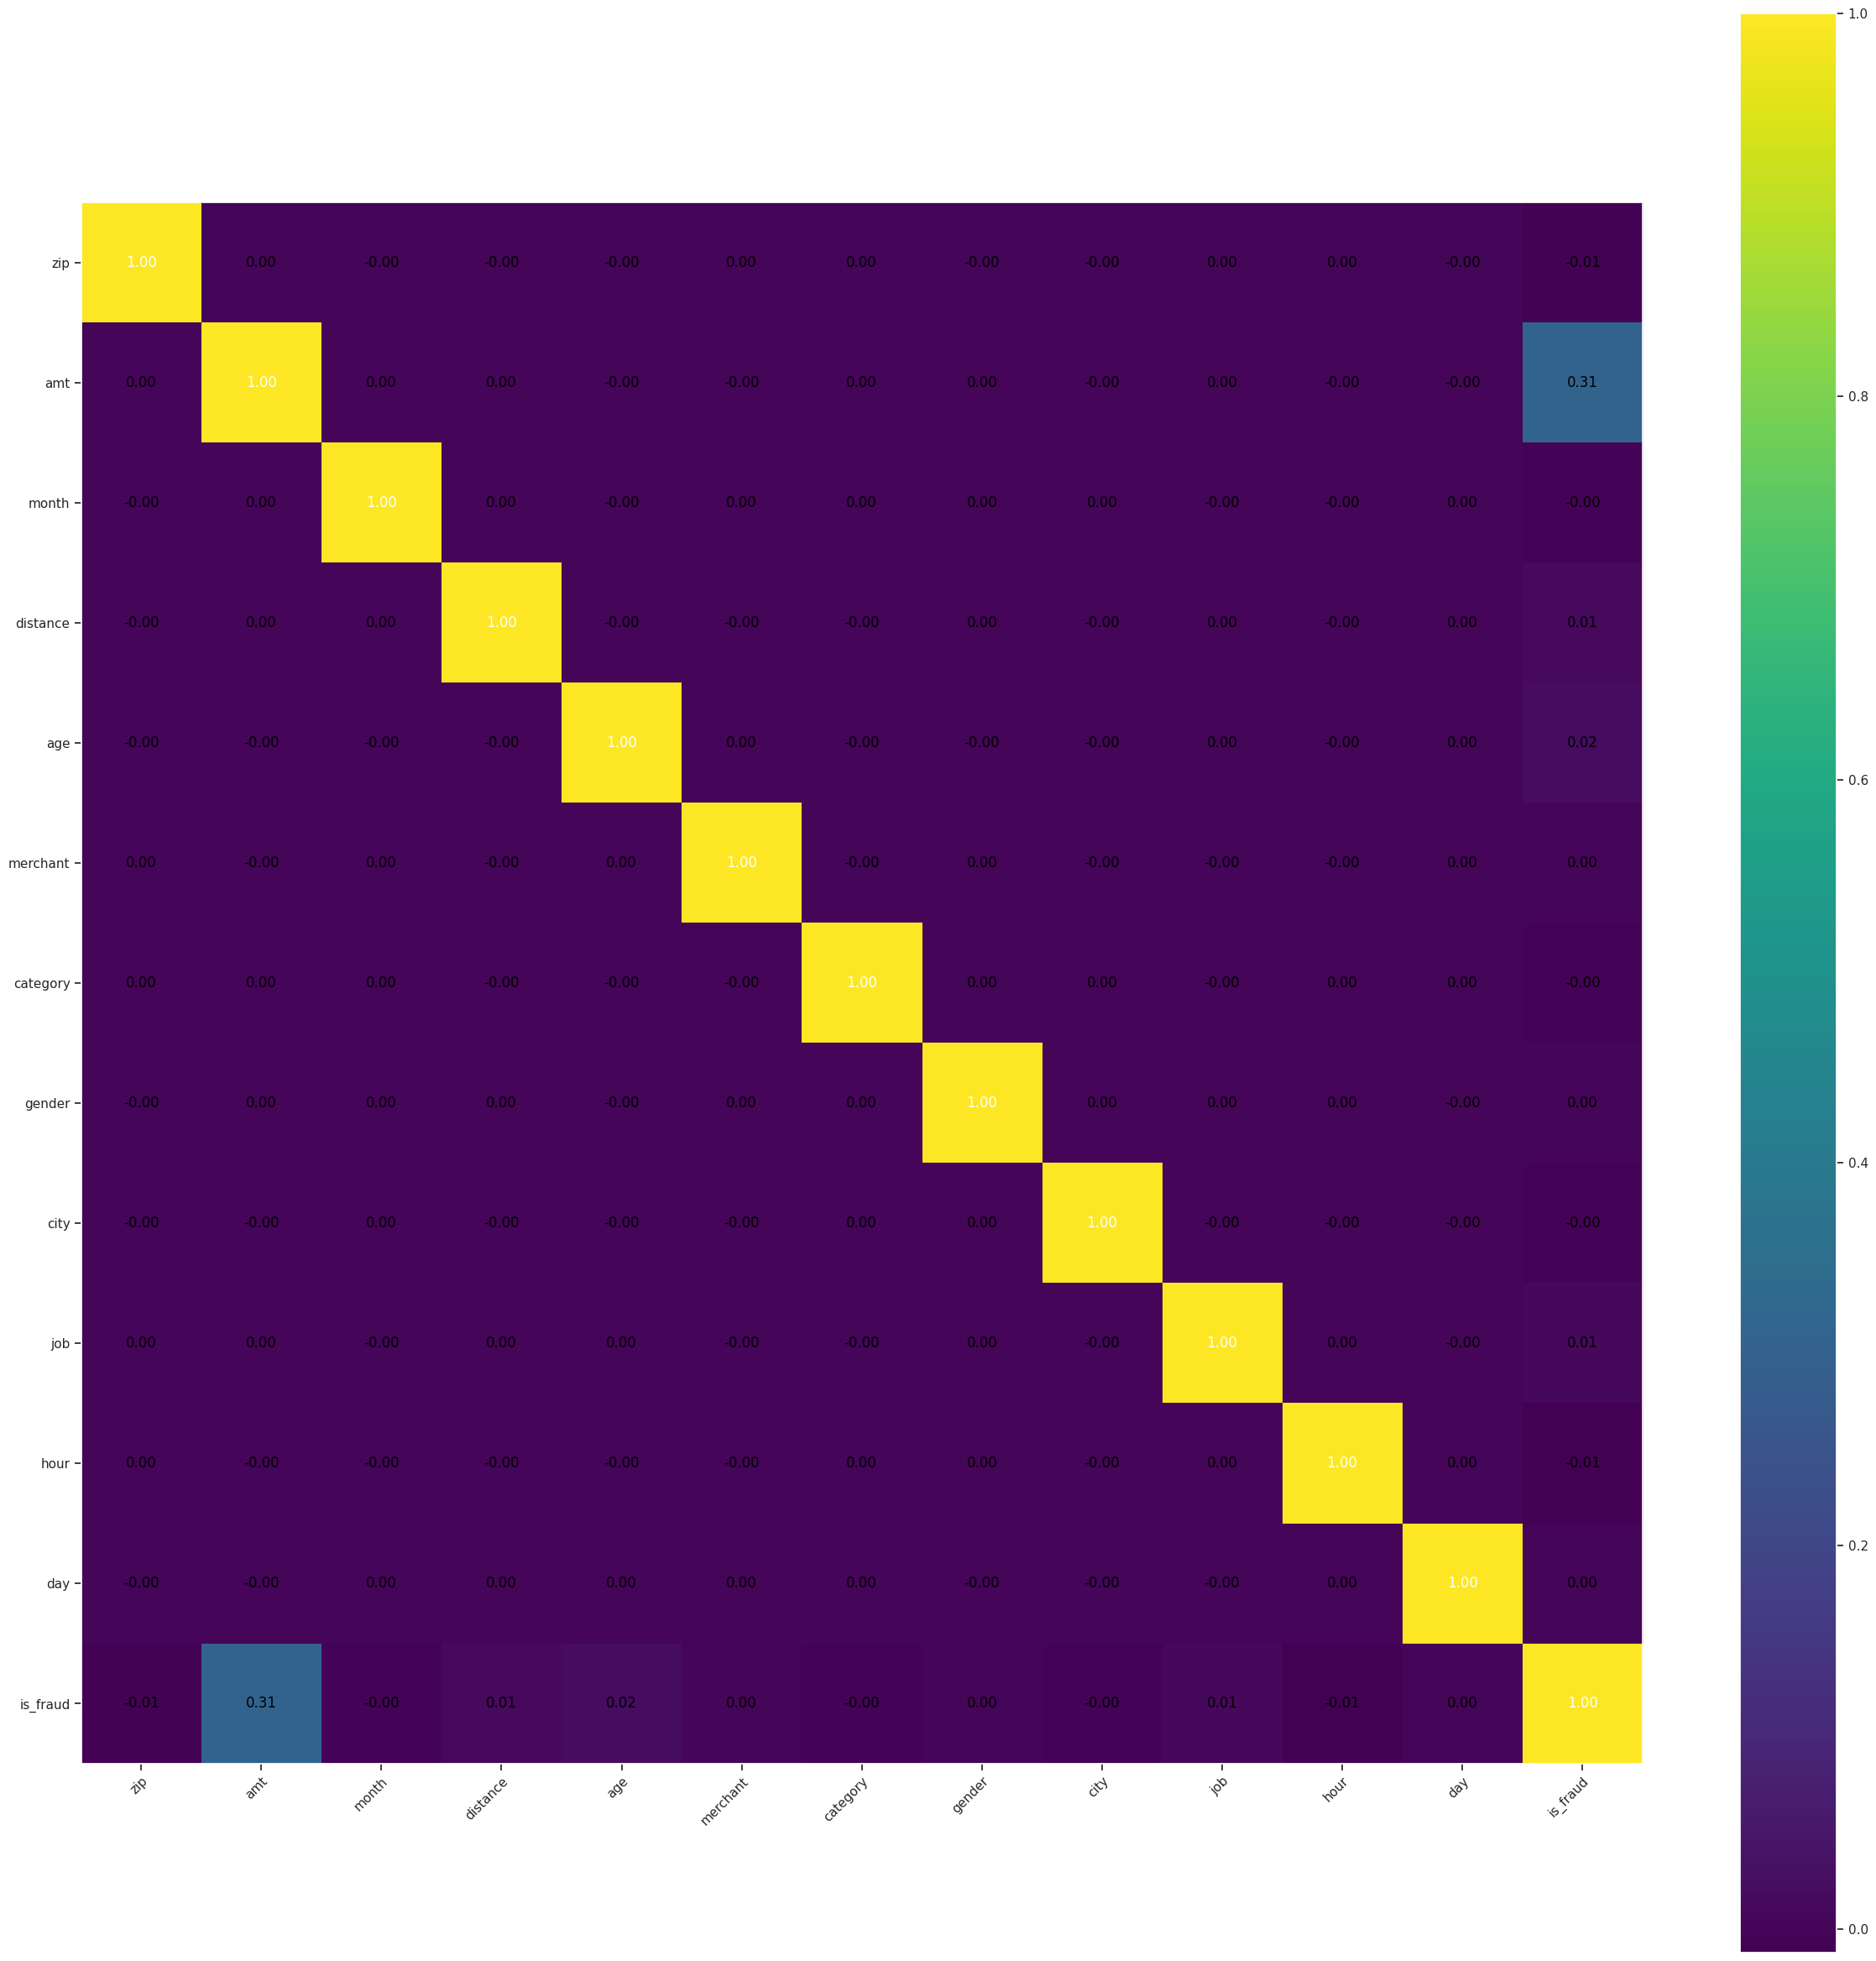

In [81]:
from mlxtend.plotting import heatmap
cols = pca_result_df.columns     # List of colmuns of dataframe Arrival_ddelay
cm = np.corrcoef(pca_result_df[cols].values.T)
hm = heatmap(cm, figsize=(30,30), row_names=cols, column_names=cols)  # Represent correlation by a heat map
plt.show()

In [82]:
from scipy.stats import spearmanr
# Calculate Spearman correlation coefficient between 'Class' and each feature

for col in cols[:-1]:
    rho, p = spearmanr(pca_result_df[col].values, pca_result_df['is_fraud'].values)
    print('Spearman correlation between Class and %s is %s' %(col, round(rho, 4)))

Spearman correlation between Class and zip is -0.0077
Spearman correlation between Class and amt is 0.1129
Spearman correlation between Class and month is -0.002
Spearman correlation between Class and distance is 0.0092
Spearman correlation between Class and age is 0.0292
Spearman correlation between Class and merchant is -0.0028
Spearman correlation between Class and category is -0.0038
Spearman correlation between Class and gender is 0.0033
Spearman correlation between Class and city is 0.004
Spearman correlation between Class and job is 0.0123
Spearman correlation between Class and hour is -0.0154
Spearman correlation between Class and day is 0.0019


In [83]:
# Define the list of features to use
feature_list = ['zip', 'amt', 'month', 'distance', 'age', 'merchant', 'category','gender', 'city', 'job', 'hour', 'day',]

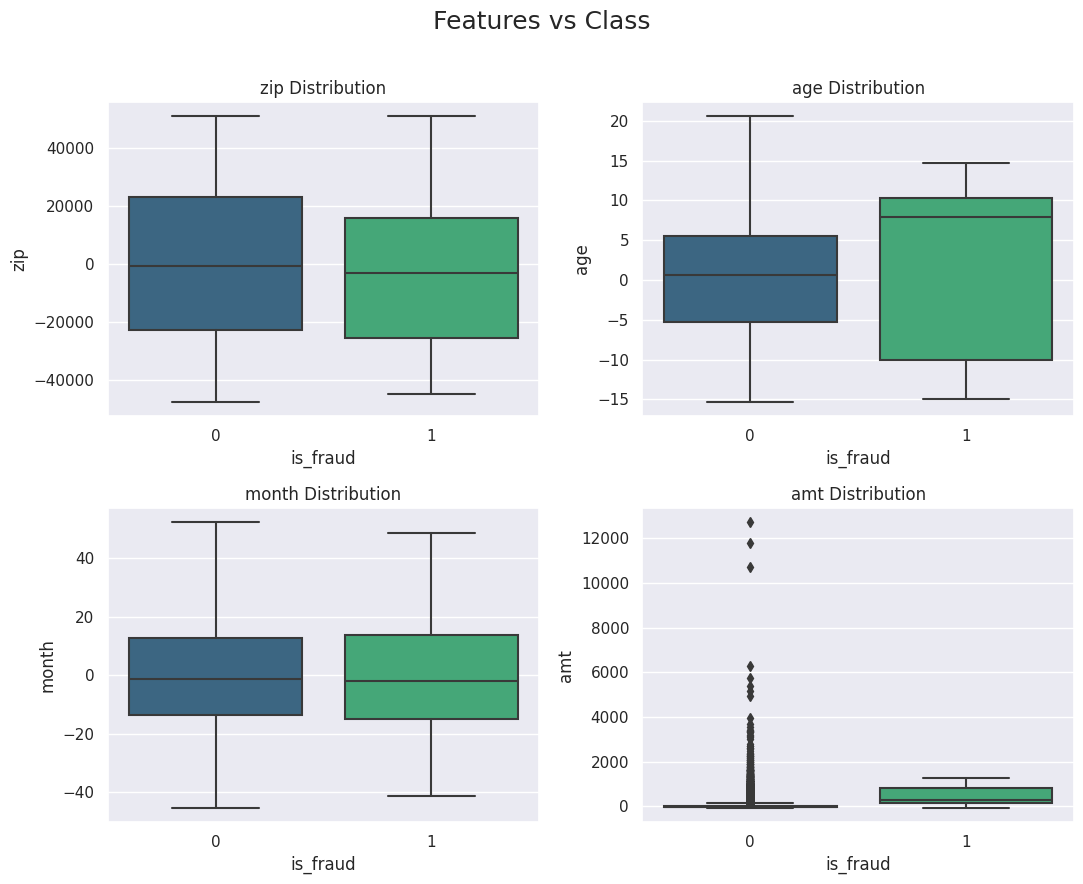

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pca_result_df is your DataFrame with PCA columns

# Create subplots for visualizing features vs. Class
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 9))
fig.suptitle('Features vs Class\n', size=18)

# Define the features you want to visualize
features_to_visualize = ['zip', 'age', 'month', 'amt']

# Create boxplots for each feature
for i, feature in enumerate(features_to_visualize):
    row, col = i // 2, i % 2  # Calculate the row and column for the subplot

    # Create a boxplot for the feature grouped by 'Class' using the viridis palette
    sns.boxplot(ax=axes[row, col], data=pca_result_df, x='is_fraud', y=feature, palette='viridis')
    axes[row, col].set_title(f"{feature} Distribution")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [85]:

def IQR_method(df, n, features):
    """
    Identify outliers in a DataFrame using the Tukey IQR method.

    Parameters:
    df (DataFrame): The input DataFrame.
    n (int): The minimum number of outliers in an observation to be considered.
    features (list): List of feature column names to analyze for outliers.

    Returns:
    list: A list of indices corresponding to observations with more than 'n' outliers.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        # Append the list of outliers
        outlier_list.extend(outlier_list_column)

    # Count occurrences of each outlier index
    outlier_count = Counter(outlier_list)

    # Select observations containing more than 'n' outliers
    multiple_outliers = [k for k, v in outlier_count.items() if v > n]

    # Calculate the total number of outliers
    total_outliers = len(multiple_outliers)

    print('Total number of outliers is:', total_outliers)

    return multiple_outliers

In [86]:
# Detecting outliers using the IQR_method function with a threshold of 1 outlier per observation
Outliers_IQR = IQR_method(pca_result_df, 1, feature_list)

# Dropping outliers from the DataFrame
df_out = pca_result_df.drop(Outliers_IQR, axis=0).reset_index(drop=True)

Total number of outliers is: 24085


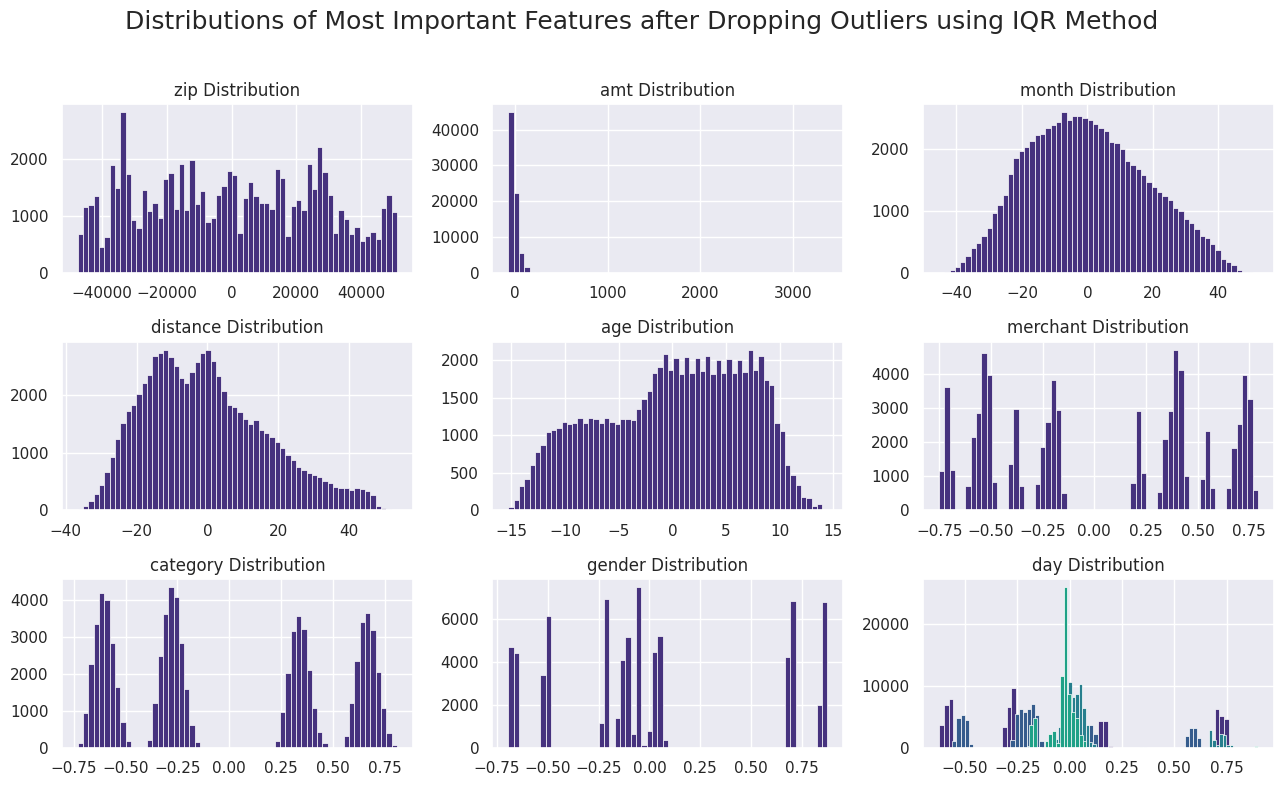

In [87]:
# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create subplots for visualizing the distributions of important features after outlier removal
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Distributions of Most Important Features after Dropping Outliers using IQR Method\n', size=18)
#'zip', 'age', 'month', 'distance', 'amt', 'merchant', 'category','gender', 'city', 'job', 'hour', 'day',
# Plot histograms for each feature
axes[0, 0].hist(df_out['zip'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 0].set_title("zip Distribution")

axes[0, 1].hist(df_out['amt'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 1].set_title("amt Distribution")

axes[0, 2].hist(df_out['month'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 2].set_title("month Distribution")

axes[1, 0].hist(df_out['distance'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 0].set_title("distance Distribution")

axes[1, 1].hist(df_out['age'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 1].set_title("age Distribution")

axes[1, 2].hist(df_out['merchant'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 2].set_title("merchant Distribution")

axes[2, 0].hist(df_out['category'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 0].set_title("category Distribution")

axes[2, 1].hist(df_out['gender'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 1].set_title("gender Distribution")

axes[2, 2].hist(df_out['city'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 2].set_title("city Distribution")

axes[2, 2].hist(df_out['job'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 2].set_title("job Distribution")

axes[2, 2].hist(df_out['hour'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 2].set_title("hour Distribution")

axes[2, 2].hist(df_out['day'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 2].set_title("day Distribution")




# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

amt: 0.3923885182151264
age: 0.13174441500044354
day: 0.08998457663283169
hour: 0.060554167930399465
distance: 0.05201199022701144
job: 0.051603403907203915
city: 0.04264562314375842
merchant: 0.04171029126348955
gender: 0.037975396576632084
zip: 0.03786109783084753
category: 0.03582211024698032
month: 0.025698409025275773


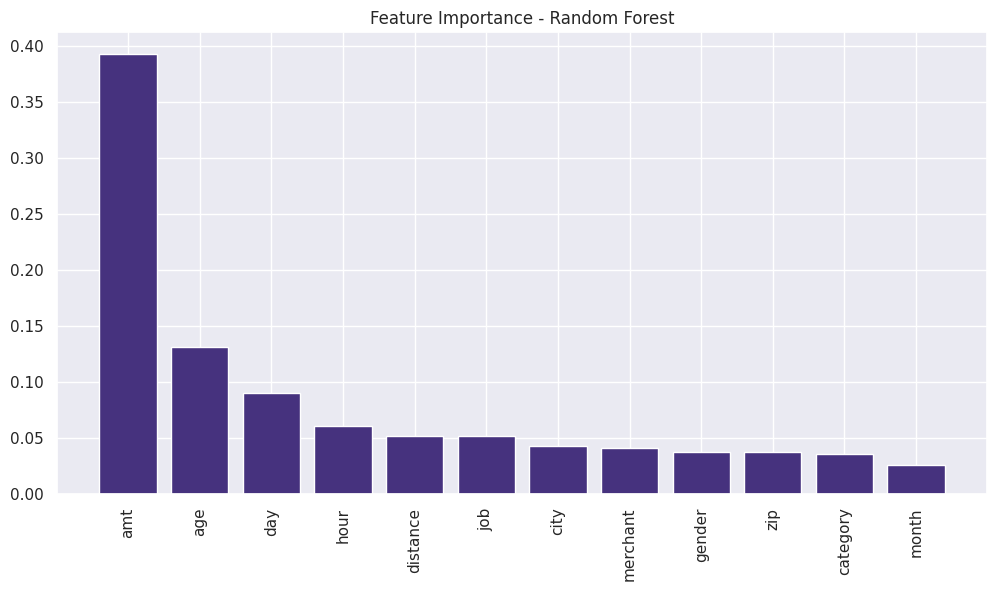

In [88]:
# Split the dataset into features (X) and the target variable (y)
X = pca_result_df.drop('is_fraud', axis=1)  # Features
y = pca_result_df['is_fraud']  # Target

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on your data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importance scores
for i, feature_index in enumerate(sorted_indices):
    print(f"{X.columns[feature_index]}: {feature_importances[feature_index]}")

# Plot feature importance scores
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices], rotation=90)
plt.show()



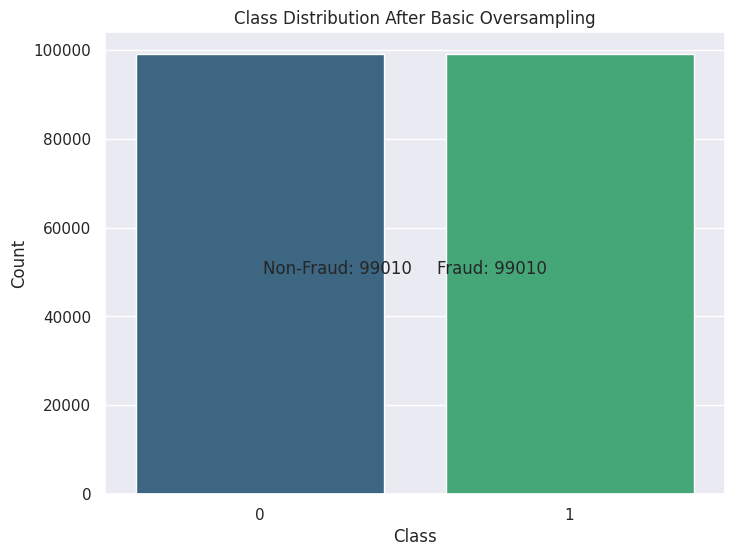

((100000, 13), (198020, 13))

In [89]:
# Separating the minority and majority class samples
data_minority = pca_result_df[pca_result_df['is_fraud'] == 1]
data_majority = pca_result_df[pca_result_df['is_fraud'] == 0]

# Oversampling the minority class
data_minority_oversampled = data_minority.sample(n=len(data_majority), replace=True, random_state=42)

# Concatenating the majority class samples and oversampled minority class samples
data_oversampled = pd.concat([data_majority, data_minority_oversampled], axis=0)

# Visualizing the distribution after basic oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data_oversampled, palette='viridis')
plt.title('Class Distribution After Basic Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.text(0.25, len(data_majority)//2, f'Non-Fraud: {len(data_majority)}', fontsize=12, ha='center')
plt.text(0.75, len(data_majority)//2, f'Fraud: {len(data_majority)}', fontsize=12, ha='center')
plt.show()

# Returning the shape of the original and oversampled data
pca_result_df.shape, data_oversampled.shape

In [90]:
# Set random seed for reproducibility
import random
from sklearn.model_selection import train_test_split
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

# Applying the provided oversampling code
data_minority = pca_result_df[pca_result_df['is_fraud'] == 1]
data_majority = pca_result_df[pca_result_df['is_fraud'] == 0]

# Oversampling the minority class
data_minority_oversampled = data_minority.sample(n=len(data_majority), replace=True, random_state=42)

# Concatenating the majority class samples and oversampled minority class samples
data_oversampled = pd.concat([data_majority, data_minority_oversampled], axis=0)

# Features and target variable for the oversampled data
X_oversampled = data_oversampled.drop('is_fraud', axis=1)
y_oversampled = data_oversampled['is_fraud']

# Splitting into training and temporary test sets (90% training, 10% temporary test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_oversampled, y_oversampled, test_size=0.1, random_state=random_seed, stratify=y_oversampled)

# Splitting the temporary test set into true validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=random_seed, stratify=y_temp)

# Checking the sizes of each set
(X_val.shape[0], X_test.shape[0], X_temp.shape[0])

(89109, 89109, 178218)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=random_seed)

# Training the model
rf_model.fit(X_temp, y_temp)

# Predictions on the validation set
y_test_pred = rf_model.predict(X_test)



# Predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Calculating Testing performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculating Validation performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Predictions on the training set
y_temp_pred = rf_model.predict(X_temp)

# Calculating performance metrics for the training set
train_accuracy = accuracy_score(y_temp, y_temp_pred)
train_precision = precision_score(y_temp, y_temp_pred)
train_recall = recall_score(y_temp, y_temp_pred)
train_f1 = f1_score(y_temp, y_temp_pred)
train_roc_auc = roc_auc_score(y_temp, y_temp_pred)
train_conf_matrix = confusion_matrix(y_temp, y_temp_pred)

# Print or display the training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)


Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[89109     0]
 [    0 89109]]


In [92]:
# Printing the performance metrics
print("Performance Metrics on Testing Set (Random Forest):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

print("-----------------------------")

# Printing the performance metrics
print("Performance Metrics on Validation Set (Random Forest):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Performance Metrics on Testing Set (Random Forest):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[44555     0]
 [    0 44554]]
-----------------------------
Performance Metrics on Validation Set (Random Forest):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[44554     0]
 [    0 44555]]


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initializing the Logistic Regression model
lr_model = LogisticRegression(random_state=random_seed)

# Training the model
lr_model.fit(X_temp, y_temp)

# Predictions on the validation set
y_test_pred = lr_model.predict(X_test)



# Predictions on the validation set
y_val_pred = lr_model.predict(X_val)

# Calculating Testing performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculating Validation performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Predictions on the training set
y_temp_pred = lr_model.predict(X_temp)

# Calculating performance metrics for the training set
train_accuracy = accuracy_score(y_temp, y_temp_pred)
train_precision = precision_score(y_temp, y_temp_pred)
train_recall = recall_score(y_temp, y_temp_pred)
train_f1 = f1_score(y_temp, y_temp_pred)
train_roc_auc = roc_auc_score(y_temp, y_temp_pred)
train_conf_matrix = confusion_matrix(y_temp, y_temp_pred)

# Print or display the training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)


Training Metrics:
Accuracy: 0.8511
Precision: 0.9382
Recall: 0.7517
F1 Score: 0.8347
ROC AUC: 0.8511
Confusion Matrix:
[[84697  4412]
 [22127 66982]]


In [94]:
# Printing the performance metrics
print("Performance Metrics on Testing Set (Logistic Regression):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

print("-----------------------------")

# Printing the performance metrics
print("Performance Metrics on Validation Set (Logistic Regression):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Performance Metrics on Testing Set (Logistic Regression):
Accuracy: 0.8528
Precision: 0.9394
Recall: 0.7543
F1 Score: 0.8367
ROC-AUC: 0.8528
Confusion Matrix:
[[42387  2168]
 [10949 33605]]
-----------------------------
Performance Metrics on Validation Set (Logistic Regression):
Accuracy: 0.8494
Precision: 0.9370
Recall: 0.7491
F1 Score: 0.8326
ROC-AUC: 0.8494
Confusion Matrix:
[[42310  2244]
 [11178 33377]]


In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initializing the Random Forest model
gb_model = GradientBoostingClassifier(random_state=random_seed)

# Training the model
gb_model.fit(X_temp, y_temp)

# Predictions on the validation set
y_test_pred = gb_model.predict(X_test)



# Predictions on the validation set
y_val_pred = gb_model.predict(X_val)

# Calculating Testing performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculating Validation performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Predictions on the training set
y_temp_pred = gb_model.predict(X_temp)

# Calculating performance metrics for the training set
train_accuracy = accuracy_score(y_temp, y_temp_pred)
train_precision = precision_score(y_temp, y_temp_pred)
train_recall = recall_score(y_temp, y_temp_pred)
train_f1 = f1_score(y_temp, y_temp_pred)
train_roc_auc = roc_auc_score(y_temp, y_temp_pred)
train_conf_matrix = confusion_matrix(y_temp, y_temp_pred)

# Print or display the training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)


Training Metrics:
Accuracy: 0.9563
Precision: 0.9542
Recall: 0.9587
F1 Score: 0.9564
ROC AUC: 0.9563
Confusion Matrix:
[[85007  4102]
 [ 3678 85431]]


In [96]:
# Printing the performance metrics
print("Performance Metrics on Testing Set (Gradient Boosting):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

print("-----------------------------")

# Printing the performance metrics
print("Performance Metrics on Validation Set (Gradient Boosting):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Performance Metrics on Testing Set (Gradient Boosting):
Accuracy: 0.9574
Precision: 0.9550
Recall: 0.9600
F1 Score: 0.9575
ROC-AUC: 0.9574
Confusion Matrix:
[[42541  2014]
 [ 1784 42770]]
-----------------------------
Performance Metrics on Validation Set (Gradient Boosting):
Accuracy: 0.9553
Precision: 0.9533
Recall: 0.9575
F1 Score: 0.9554
ROC-AUC: 0.9553
Confusion Matrix:
[[42466  2088]
 [ 1894 42661]]


In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initializing the Support Vector Machine model
svm_model = SVC(random_state=random_seed)

# Training the model
svm_model.fit(X_temp, y_temp)

# Predictions on the validation set
y_test_pred = svm_model.predict(X_test)



# Predictions on the validation set
y_val_pred = svm_model.predict(X_val)

# Calculating Testing performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculating Validation performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Predictions on the training set
y_temp_pred = svm_model.predict(X_temp)

# Calculating performance metrics for the training set
train_accuracy = accuracy_score(y_temp, y_temp_pred)
train_precision = precision_score(y_temp, y_temp_pred)
train_recall = recall_score(y_temp, y_temp_pred)
train_f1 = f1_score(y_temp, y_temp_pred)
train_roc_auc = roc_auc_score(y_temp, y_temp_pred)
train_conf_matrix = confusion_matrix(y_temp, y_temp_pred)

# Print or display the training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)


Training Metrics:
Accuracy: 0.8086
Precision: 0.9700
Recall: 0.6370
F1 Score: 0.7690
ROC AUC: 0.8086
Confusion Matrix:
[[87353  1756]
 [32350 56759]]


In [98]:
# Printing the performance metrics
print("Performance Metrics on Testing Set (SVM Model):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

print("-----------------------------")

# Printing the performance metrics
print("Performance Metrics on Validation Set (SVM Model):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Performance Metrics on Testing Set (SVM Model):
Accuracy: 0.8102
Precision: 0.9710
Recall: 0.6395
F1 Score: 0.7711
ROC-AUC: 0.8102
Confusion Matrix:
[[43703   852]
 [16062 28492]]
-----------------------------
Performance Metrics on Validation Set (SVM Model):
Accuracy: 0.8071
Precision: 0.9690
Recall: 0.6344
F1 Score: 0.7668
ROC-AUC: 0.8071
Confusion Matrix:
[[43650   904]
 [16288 28267]]


In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_temp, y_temp)

# Predictions on the validation set
y_test_pred = knn_classifier.predict(X_test)



# Predictions on the validation set
y_val_pred = knn_classifier.predict(X_val)

# Calculating Testing performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculating Validation performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Predictions on the training set
y_temp_pred = knn_classifier.predict(X_temp)

# Calculating performance metrics for the training set
train_accuracy = accuracy_score(y_temp, y_temp_pred)
train_precision = precision_score(y_temp, y_temp_pred)
train_recall = recall_score(y_temp, y_temp_pred)
train_f1 = f1_score(y_temp, y_temp_pred)
train_roc_auc = roc_auc_score(y_temp, y_temp_pred)
train_conf_matrix = confusion_matrix(y_temp, y_temp_pred)

# Print or display the training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)


Training Metrics:
Accuracy: 0.9968
Precision: 0.9935
Recall: 1.0000
F1 Score: 0.9968
ROC AUC: 0.9968
Confusion Matrix:
[[88530   579]
 [    0 89109]]


In [100]:
# Printing the performance metrics
print("Performance Metrics on Testing Set (KNN Classifier):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

print("-----------------------------")

# Printing the performance metrics
print("Performance Metrics on Validation Set (KNN Classifier):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Performance Metrics on Testing Set (KNN Classifier):
Accuracy: 0.9967
Precision: 0.9934
Recall: 1.0000
F1 Score: 0.9967
ROC-AUC: 0.9967
Confusion Matrix:
[[44261   294]
 [    0 44554]]
-----------------------------
Performance Metrics on Validation Set (KNN Classifier):
Accuracy: 0.9968
Precision: 0.9936
Recall: 1.0000
F1 Score: 0.9968
ROC-AUC: 0.9968
Confusion Matrix:
[[44269   285]
 [    0 44555]]
